In [5]:
import math
#Для рассчёта интегралов перекрытия
#Параметры волокна
w = 3.25e-6 #Радиус поля моды
b = 2e-6 #Радиус сердцевины
NA = 0.2 #Числовая апертура
Ner = 1.9e25 #Концетрация ионов эрбия
sigma12S = 3.198e-25 #Сечение поглощения для сигнала
sigma12P = 2.245e-25 #Сечение поглощения для накачки
#Параметры для сигнала
Gs = 1 - math.exp(-(2 * b**2) / (w**2)) #Интеграл перекрытия для сигнала
#Параметры для накачки
Vp = math.pi * 2 * b * NA / (980e-9) #Нормированная частота для накачки
wp = b * (0.65 + 1.65/((Vp)**1.5) + 2.879/((Vp)**6)) #Поле моды для накачки
Gp = 1 - math.exp(-(2 * b**2) / (wp**2)) #Интеграл перекрытия для накачки
print("Фактор перекрытия для сигнала:",Gs)
print("Фактор перекрытия для накачки:",Gp)

Фактор перекрытия для сигнала: 0.5311143935168284
Фактор перекрытия для накачки: 0.8302974312387831


Решение найдено: x = 0.00085850616711977 для 0.02 мВт
Решение найдено: x = 0.0022479648054473922 для 0.04 мВт
Решение найдено: x = 0.003637431682385899 для 0.06 мВт
Решение найдено: x = 0.005026897421510359 для 0.08 мВт
Решение найдено: x = 0.0064163651279029975 для 0.1 мВт
Решение найдено: x = 0.007805832220890252 для 0.12 мВт
Решение найдено: x = 0.009195299241342105 для 0.14 мВт
Решение найдено: x = 0.010584767835934624 для 0.16 мВт
Решение найдено: x = 0.011974234207968204 для 0.18 мВт
Решение найдено: x = 0.01336370221465069 для 0.2 мВт
Решение найдено: x = 0.01683737103003194 для 0.25 мВт
Решение найдено: x = 0.020311038340919418 для 0.3 мВт
Решение найдено: x = 0.023784706528633678 для 0.35 мВт
Решение найдено: x = 0.02725837603813806 для 0.4 мВт
Решение найдено: x = 0.030732045344066 для 0.45 мВт
Решение найдено: x = 0.0342057124494478 для 0.5 мВт
Решение найдено: x = 0.03767938096788724 для 0.55 мВт
Решение найдено: x = 0.04115304952742567 для 0.6 мВт
Решение найдено: x = 0.04

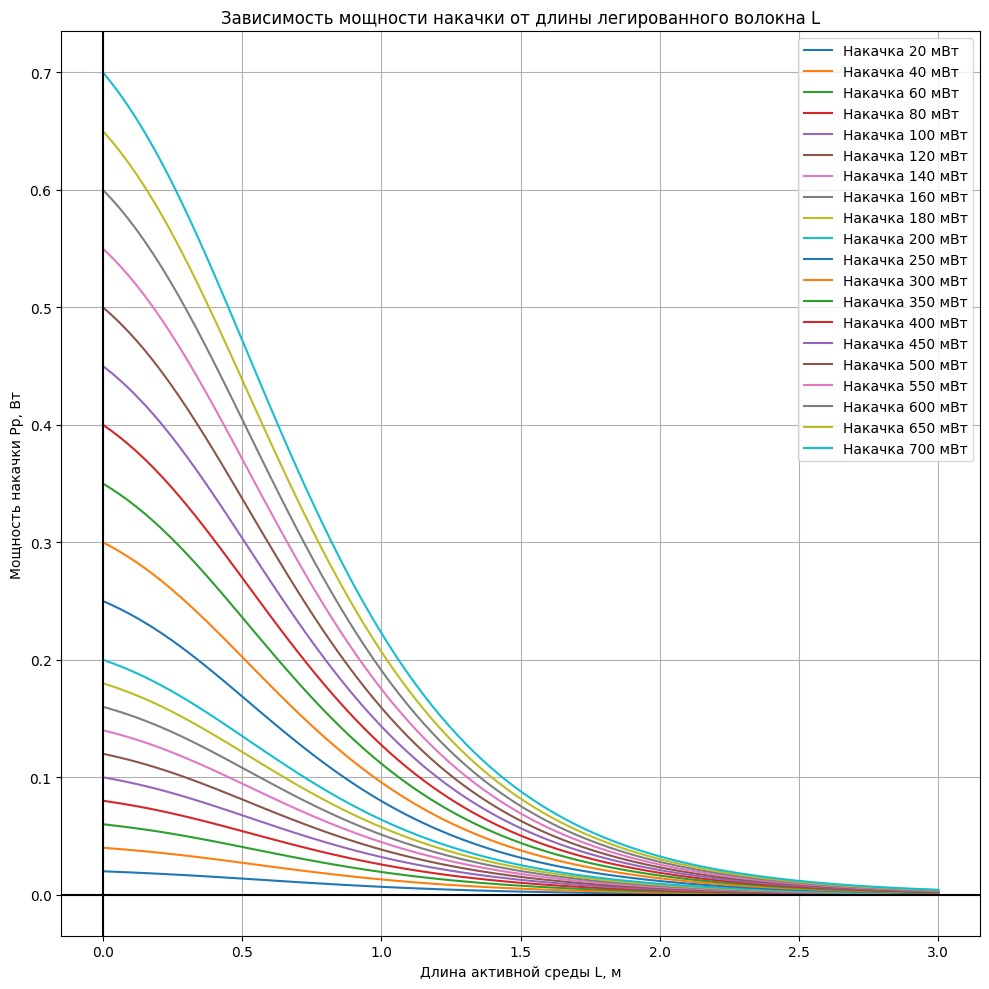

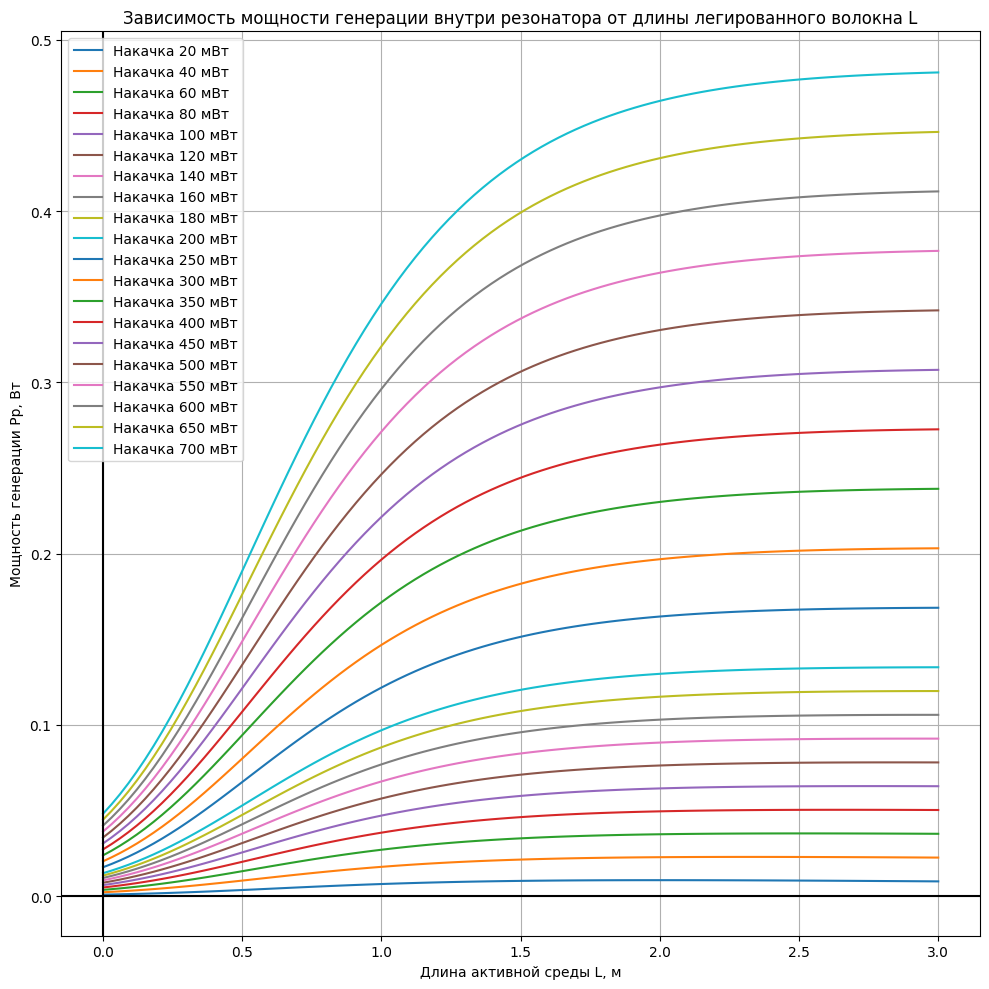

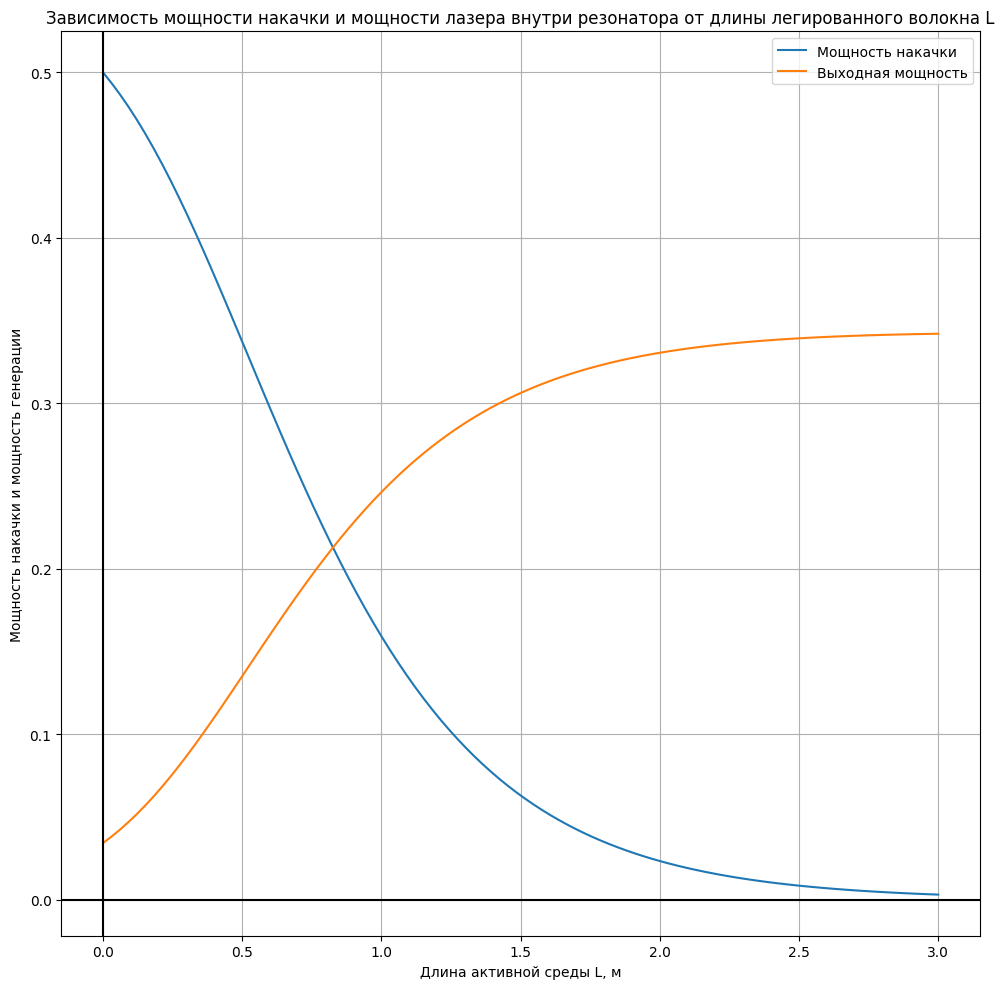

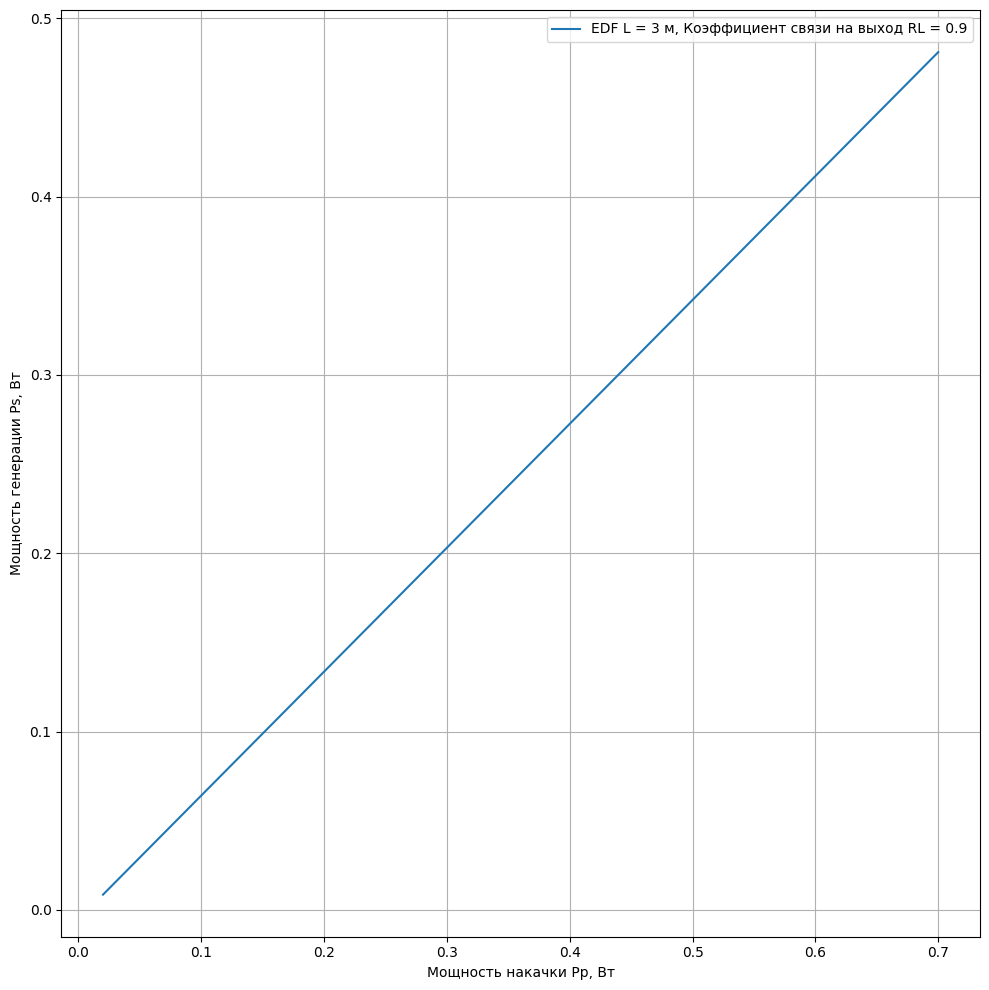

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
# Константы
t21 = 10e-3 #Время жизни верхнего уровня
h = 6.6e-34 #Постоянная Планка
Aeff = 3.14 * (2e-6)**2 #Эффективная площадь ионов в поперечном сечении
Gp = 0.83 #Интеграл перекрытия для накачки - как поле моды накачки перекрывается с ионами режкоземельного элемента
Gs = 0.5311143935168284 #Интеграл перекрытия для сигнала
C = 3e8 #Скорость света
hs = 1550e-9 #Длина волны сигнала
hp = 980e-9 #Длина волны накачки
Ner = 1.9e25 #Концетрация ионов редкоземельного элемента
alphap = 0.006 #Потери на распространение в волокне для накачки
alphas = 0.0 #Потери на распространение в волокне для сигнала
l = 3 #Длина активной среды
dhs = 0.16e-9 #Ширина линии, на которой происходит отражение от брэгговской решётки
sigma12S = 3.198e-25 #Сечение поглощения для сигнала
sigma21S = 4.4e-25 #Сечение излучения для сигнала
sigma12P = 2.245e-25 #Сечение поглощения для накачки
sigma21P = 0.0 #Сечение излучения для накачки
z0 = 0
Z = 50
H = l / Z
z = np.linspace(z0, l, Z)
R2 = 0.1 # Коэффициент связи оптического ответвителя на выход излучения
epsilon = 1e-7  # Точность для вычислений
x_0 = 0.001 #Первое начальное предположение
x_1 = 0.01 #Второе начальное предположение
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, N1, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21
def dN1(z, N2, N1, Pp, Ps):
    return -(Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
            (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21)
def dPp(z, N2, N1, Pp):
    return Gp * (sigma21P * N2 - sigma12P * N1) * Pp - alphap * Pp
def dPs(z, N2, N1, Ps):
    return Gs * (sigma21S * N2 - sigma12S * N1) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(z, y):
    N2, N1, Pp, Ps = y
    return np.array([dN2(z, N2, N1, Pp, Ps), dN1(z, N2, N1, Pp, Ps), dPp(z, N2, N1, Pp), dPs(z, N2, N1, Ps)])
#Функция поиска начальных значений для мощности сигнала
def objective(x, Pp):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x], method='RK45', max_step=H)
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
Pp_kek = np.array([20e-3, 40e-3, 60e-3, 80e-3, 100e-3, 120e-3, 140e-3, 160e-3, 180e-3, 200e-3, 250e-3, 300e-3, 350e-3, 400e-3, 
    450e-3, 500e-3, 550e-3, 600e-3, 650e-3, 700e-3])
#Используем встроенную функцию root_scalar для разлчиных мошностей накачки
result_20mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0]))
result_40mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1]))
result_60mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2]))
result_80mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3]))
result_100mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4]))
result_120mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5]))
result_140mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6]))
result_160mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7]))
result_180mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8]))
result_200mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9]))
result_250mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10]))
result_300mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11]))
result_350mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12]))
result_400mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13]))
result_450mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14]))
result_500mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15]))
result_550mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16]))
result_600mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17]))
result_650mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18]))
result_700mW = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19]))
if result_20mW.converged:
    print(f"Решение найдено: x = {result_20mW.root} для {Pp_kek[0]} мВт")
else:
    print("Метод секущих не сошелся")
if result_40mW.converged:
    print(f"Решение найдено: x = {result_40mW.root} для {Pp_kek[1]} мВт")
else:
    print("Метод секущих не сошелся")
if result_60mW.converged:
    print(f"Решение найдено: x = {result_60mW.root} для {Pp_kek[2]} мВт")
else:
    print("Метод секущих не сошелся")
if result_80mW.converged:
    print(f"Решение найдено: x = {result_80mW.root} для {Pp_kek[3]} мВт")
else:
    print("Метод секущих не сошелся")
if result_100mW.converged:
    print(f"Решение найдено: x = {result_100mW.root} для {Pp_kek[4]} мВт")
else:
    print("Метод секущих не сошелся")
if result_120mW.converged:
    print(f"Решение найдено: x = {result_120mW.root} для {Pp_kek[5]} мВт")
else:
    print("Метод секущих не сошелся")
if result_140mW.converged:
    print(f"Решение найдено: x = {result_140mW.root} для {Pp_kek[6]} мВт")
else:
    print("Метод секущих не сошелся")
if result_160mW.converged:
    print(f"Решение найдено: x = {result_160mW.root} для {Pp_kek[7]} мВт")
else:
    print("Метод секущих не сошелся")
if result_180mW.converged:
    print(f"Решение найдено: x = {result_180mW.root} для {Pp_kek[8]} мВт")
else:
    print("Метод секущих не сошелся")
if result_200mW.converged:
    print(f"Решение найдено: x = {result_200mW.root} для {Pp_kek[9]} мВт")
else:
    print("Метод секущих не сошелся")
if result_250mW.converged:
    print(f"Решение найдено: x = {result_250mW.root} для {Pp_kek[10]} мВт")
else:
    print("Метод секущих не сошелся")
if result_300mW.converged:
    print(f"Решение найдено: x = {result_300mW.root} для {Pp_kek[11]} мВт")
else:
    print("Метод секущих не сошелся")
if result_350mW.converged:
    print(f"Решение найдено: x = {result_350mW.root} для {Pp_kek[12]} мВт")
else:
    print("Метод секущих не сошелся")
if result_400mW.converged:
    print(f"Решение найдено: x = {result_400mW.root} для {Pp_kek[13]} мВт")
else:
    print("Метод секущих не сошелся")
if result_450mW.converged:
    print(f"Решение найдено: x = {result_450mW.root} для {Pp_kek[14]} мВт")
else:
    print("Метод секущих не сошелся")
if result_500mW.converged:
    print(f"Решение найдено: x = {result_500mW.root} для {Pp_kek[15]} мВт")
else:
    print("Метод секущих не сошелся")
if result_550mW.converged:
    print(f"Решение найдено: x = {result_550mW.root} для {Pp_kek[16]} мВт")
else:
    print("Метод секущих не сошелся")
if result_600mW.converged:
    print(f"Решение найдено: x = {result_600mW.root} для {Pp_kek[17]} мВт")
else:
    print("Метод секущих не сошелся")
if result_650mW.converged:
    print(f"Решение найдено: x = {result_650mW.root} для {Pp_kek[18]} мВт")
else:
    print("Метод секущих не сошелся")
if result_700mW.converged:
    print(f"Решение найдено: x = {result_700mW.root} для {Pp_kek[19]} мВт")
else:
    print("Метод секущих не сошелся")
#Функция для посика итогового распределения
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0 #Начальное значение ионов на верхнем энергетическом уровне
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Ner, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[2]
    Ps = sol.y[3]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp
N2_20mW, Pp_20mW, Ps_20mW = propa(Pp_kek[0], result_20mW.root)
N2_40mW, Pp_40mW, Ps_40mW = propa(Pp_kek[1], result_40mW.root)
N2_60mW, Pp_60mW, Ps_60mW = propa(Pp_kek[2], result_60mW.root)
N2_80mW, Pp_80mW, Ps_80mW = propa(Pp_kek[3], result_80mW.root)
N2_100mW, Pp_100mW, Ps_100mW = propa(Pp_kek[4],  result_100mW.root)
N2_120mW, Pp_120mW, Ps_120mW = propa(Pp_kek[5], result_120mW.root)
N2_140mW, Pp_140mW, Ps_140mW = propa(Pp_kek[6],  result_140mW.root)
N2_160mW, Pp_160mW, Ps_160mW = propa(Pp_kek[7],  result_160mW.root)
N2_180mW, Pp_180mW, Ps_180mW = propa(Pp_kek[8],  result_180mW.root)
N2_200mW, Pp_200mW, Ps_200mW = propa(Pp_kek[9],  result_200mW.root)
N2_250mW, Pp_250mW, Ps_250mW = propa(Pp_kek[10],  result_250mW.root)
N2_300mW, Pp_300mW, Ps_300mW = propa(Pp_kek[11],  result_300mW.root)
N2_350mW, Pp_350mW, Ps_350mW = propa(Pp_kek[12],  result_350mW.root)
N2_400mW, Pp_400mW, Ps_400mW = propa(Pp_kek[13],  result_400mW.root)
N2_450mW, Pp_450mW, Ps_450mW = propa(Pp_kek[14],  result_450mW.root)
N2_500mW, Pp_500mW, Ps_500mW = propa(Pp_kek[15],  result_500mW.root)
N2_550mW, Pp_550mW, Ps_550mW = propa(Pp_kek[16],  result_550mW.root)
N2_600mW, Pp_600mW, Ps_600mW = propa(Pp_kek[17],  result_600mW.root)
N2_650mW, Pp_650mW, Ps_650mW = propa(Pp_kek[18],  result_650mW.root)
N2_700mW, Pp_700mW, Ps_700mW = propa(Pp_kek[19],  result_700mW.root)
Pp_all = np.array([Pp_20mW[0], Pp_40mW[0], Pp_60mW[0], Pp_80mW[0], Pp_100mW[0], Pp_120mW[0], Pp_140mW[0], Pp_160mW[0], 
    Pp_180mW[0], Pp_200mW[0], Pp_250mW[0], Pp_300mW[0], Pp_350mW[0], Pp_400mW[0], Pp_450mW[0], Pp_500mW[0], Pp_550mW[0],
    Pp_600mW[0], Pp_650mW[0], Pp_700mW[0]])
Ps_all = np.array([Ps_20mW[-1], Ps_40mW[-1], Ps_60mW[-1], Ps_80mW[-1], Ps_100mW[-1], Ps_120mW[-1], Ps_140mW[-1], Ps_160mW[-1],
    Ps_180mW[-1], Ps_200mW[-1], Ps_250mW[-1], Ps_300mW[-1], Ps_350mW[-1], Ps_400mW[-1] ,Ps_450mW[-1] ,Ps_500mW[-1], 
    Ps_550mW[-1] ,Ps_600mW[-1] ,Ps_650mW[-1] ,Ps_700mW[-1]])
#Ыыыыыы графыкиии ыыыы
#График №1
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW, label ='Накачка 20 мВт')
plt.plot(z, Pp_40mW, label ='Накачка 40 мВт')
plt.plot(z, Pp_60mW, label ='Накачка 60 мВт')
plt.plot(z, Pp_80mW, label ='Накачка 80 мВт')
plt.plot(z, Pp_100mW, label ='Накачка 100 мВт')
plt.plot(z, Pp_120mW, label ='Накачка 120 мВт')
plt.plot(z, Pp_140mW, label ='Накачка 140 мВт')
plt.plot(z, Pp_160mW, label ='Накачка 160 мВт')
plt.plot(z, Pp_180mW, label ='Накачка 180 мВт')
plt.plot(z, Pp_200mW, label ='Накачка 200 мВт')
plt.plot(z, Pp_250mW, label ='Накачка 250 мВт')
plt.plot(z, Pp_300mW, label ='Накачка 300 мВт')
plt.plot(z, Pp_350mW, label ='Накачка 350 мВт')
plt.plot(z, Pp_400mW, label ='Накачка 400 мВт')
plt.plot(z, Pp_450mW, label ='Накачка 450 мВт')
plt.plot(z, Pp_500mW, label ='Накачка 500 мВт')
plt.plot(z, Pp_550mW, label ='Накачка 550 мВт')
plt.plot(z, Pp_600mW, label ='Накачка 600 мВт')
plt.plot(z, Pp_650mW, label ='Накачка 650 мВт')
plt.plot(z, Pp_700mW, label ='Накачка 700 мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title("Зависимость мощности накачки от длины легированного волокна L")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW, label ='Накачка 20 мВт')
plt.plot(z, Ps_40mW, label ='Накачка 40 мВт')
plt.plot(z, Ps_60mW, label ='Накачка 60 мВт')
plt.plot(z, Ps_80mW, label ='Накачка 80 мВт')
plt.plot(z, Ps_100mW, label ='Накачка 100 мВт')
plt.plot(z, Ps_120mW, label ='Накачка 120 мВт')
plt.plot(z, Ps_140mW, label ='Накачка 140 мВт')
plt.plot(z, Ps_160mW, label ='Накачка 160 мВт')
plt.plot(z, Ps_180mW, label ='Накачка 180 мВт')
plt.plot(z, Ps_200mW, label ='Накачка 200 мВт')
plt.plot(z, Ps_250mW, label ='Накачка 250 мВт')
plt.plot(z, Ps_300mW, label ='Накачка 300 мВт')
plt.plot(z, Ps_350mW, label ='Накачка 350 мВт')
plt.plot(z, Ps_400mW, label ='Накачка 400 мВт')
plt.plot(z, Ps_450mW, label ='Накачка 450 мВт')
plt.plot(z, Ps_500mW, label ='Накачка 500 мВт')
plt.plot(z, Ps_550mW, label ='Накачка 550 мВт')
plt.plot(z, Ps_600mW, label ='Накачка 600 мВт')
plt.plot(z, Ps_650mW, label ='Накачка 650 мВт')
plt.plot(z, Ps_700mW, label ='Накачка 700 мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title("Зависимость мощности генерации внутри резонатора от длины легированного волокна L")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность генерации Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №3
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW, label ='Мощность накачки')
plt.plot(z, Ps_500mW, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title("Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №4
plt.figure(figsize = (10,10))
plt.plot(Pp_all, Ps_all, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - R2:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
# Константы
t21 = 10e-3 #Время жизни верхнего уровня
h = 6.6e-34 #Постоянная Планка
Aeff = 3.14 * (2e-6)**2 #Эффективная площадь ионов в поперечном сечении
Gp = 0.83 #Интеграл перекрытия для накачки - как поле моды накачки перекрывается с ионами режкоземельного элемента
Gs = 0.5311143935168284 #Интеграл перекрытия для сигнала
C = 3e8 #Скорость света
hs = 1550e-9 #Длина волны сигнала
hp = 980e-9 #Длина волны накачки
Ner = 1.9e25 #Концетрация ионов редкоземельного элемента
alphap = 0.006 #Потери на распространение в волокне для накачки
alphas = 0.0 #Потери на распространение в волокне для сигнала
l = 3 #Длина активной среды
dhs = 0.16e-9 #Ширина линии, на которой происходит отражение от брэгговской решётки
sigma12S = 3.198e-25 #Сечение поглощения для сигнала
sigma21S = 4.4e-25 #Сечение излучения для сигнала
sigma12P = 2.245e-25 #Сечение поглощения для накачки
sigma21P = 0.0 #Сечение излучения для накачки
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
Rl_all = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]) # Коэффициент связи оптического ответвителя на выход излучения
epsilon = 1e-7  # Точность для вычислений
x_0 = 0.001 #Первое начальное предположение
x_1 = 0.1 #Второе начальное предположение
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, N1, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21
def dN1(z, N2, N1, Pp, Ps):
    return -(Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
            (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21)
def dPp(z, N2, N1, Pp):
    return Gp * (sigma21P * N2 - sigma12P * N1) * Pp - alphap * Pp
def dPs(z, N2, N1, Ps):
    return Gs * (sigma21S * N2 - sigma12S * N1) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(z, y):
    N2, N1, Pp, Ps = y
    return np.array([dN2(z, N2, N1, Pp, Ps), dN1(z, N2, N1, Pp, Ps), dPp(z, N2, N1, Pp), dPs(z, N2, N1, Ps)])
#Функция поиска начальных значений для мощности сигнала
def objective(x, Pp, Rl):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x], method='RK45', max_step=H)
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * Rl - x  # Условие для метода секущих
Pp_kek = np.array([20e-3, 40e-3, 60e-3, 80e-3, 100e-3, 120e-3, 140e-3, 160e-3, 180e-3, 200e-3, 250e-3, 300e-3, 350e-3, 400e-3, 
    450e-3, 500e-3, 550e-3, 600e-3, 650e-3, 700e-3])
#Используем встроенную функцию root_scalar для разлчиных мошностей накачки
#Для Rl = 0.01
result_20mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[0]))
result_40mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[0]))
result_60mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[0]))
result_80mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[0]))
result_100mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[0]))
result_120mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[0]))
result_140mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[0]))
result_160mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[0]))
result_180mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[0]))
result_200mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[0]))
result_250mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[0]))
result_300mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[0]))
result_350mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[0]))
result_400mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[0]))
result_450mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[0]))
result_500mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[0]))
result_550mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[0]))
result_600mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[0]))
result_650mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[0]))
result_700mW_0_01 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[0]))
#Для Rl = 0.1
result_20mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[1]))
result_40mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[1]))
result_60mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[1]))
result_80mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[1]))
result_100mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[1]))
result_120mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[1]))
result_140mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[1]))
result_160mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[1]))
result_180mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[1]))
result_200mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[1]))
result_250mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[1]))
result_300mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[1]))
result_350mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[1]))
result_400mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[1]))
result_450mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[1]))
result_500mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[1]))
result_550mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[1]))
result_600mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[1]))
result_650mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[1]))
result_700mW_0_1 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[1]))
#Для Rl = 0.2
result_20mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[2]))
result_40mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[2]))
result_60mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[2]))
result_80mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[2]))
result_100mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[2]))
result_120mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[2]))
result_140mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[2]))
result_160mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[2]))
result_180mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[2]))
result_200mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[2]))
result_250mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[2]))
result_300mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[2]))
result_350mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[2]))
result_400mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[2]))
result_450mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[2]))
result_500mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[2]))
result_550mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[2]))
result_600mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[2]))
result_650mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[2]))
result_700mW_0_2 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[2]))
#Для Rl = 0.3
result_20mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[3]))
result_40mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[3]))
result_60mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[3]))
result_80mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[3]))
result_100mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[3]))
result_120mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[3]))
result_140mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[3]))
result_160mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[3]))
result_180mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[3]))
result_200mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[3]))
result_250mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[3]))
result_300mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[3]))
result_350mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[3]))
result_400mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[3]))
result_450mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[3]))
result_500mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[3]))
result_550mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[3]))
result_600mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[3]))
result_650mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[3]))
result_700mW_0_3 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[3]))
#Для Rl = 0.4
result_20mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[4]))
result_40mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[4]))
result_60mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[4]))
result_80mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[4]))
result_100mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[4]))
result_120mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[4]))
result_140mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[4]))
result_160mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[4]))
result_180mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[4]))
result_200mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[4]))
result_250mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[4]))
result_300mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[4]))
result_350mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[4]))
result_400mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[4]))
result_450mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[4]))
result_500mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[4]))
result_550mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[4]))
result_600mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[4]))
result_650mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[4]))
result_700mW_0_4 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[4]))
#Для Rl = 0.5
result_20mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[5]))
result_40mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[5]))
result_60mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[5]))
result_80mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[5]))
result_100mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[5]))
result_120mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[5]))
result_140mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[5]))
result_160mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[5]))
result_180mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[5]))
result_200mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[5]))
result_250mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[5]))
result_300mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[5]))
result_350mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[5]))
result_400mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[5]))
result_450mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[5]))
result_500mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[5]))
result_550mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[5]))
result_600mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[5]))
result_650mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[5]))
result_700mW_0_5 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[5]))
#Для Rl = 0.6
result_20mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[6]))
result_40mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[6]))
result_60mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[6]))
result_80mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[6]))
result_100mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[6]))
result_120mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[6]))
result_140mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[6]))
result_160mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[6]))
result_180mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[6]))
result_200mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[6]))
result_250mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[6]))
result_300mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[6]))
result_350mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[6]))
result_400mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[6]))
result_450mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[6]))
result_500mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[6]))
result_550mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[6]))
result_600mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[6]))
result_650mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[6]))
result_700mW_0_6 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[6]))
#Для Rl = 0.7
result_20mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[7]))
result_40mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[7]))
result_60mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[7]))
result_80mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[7]))
result_100mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[7]))
result_120mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[7]))
result_140mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[7]))
result_160mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[7]))
result_180mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[7]))
result_200mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[7]))
result_250mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[7]))
result_300mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[7]))
result_350mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[7]))
result_400mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[7]))
result_450mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[7]))
result_500mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[7]))
result_550mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[7]))
result_600mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[7]))
result_650mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[7]))
result_700mW_0_7 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[7]))
#Для Rl = 0.8
result_20mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[8]))
result_40mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[8]))
result_60mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[8]))
result_80mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[8]))
result_100mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[8]))
result_120mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[8]))
result_140mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[8]))
result_160mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[8]))
result_180mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[8]))
result_200mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[8]))
result_250mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[8]))
result_300mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[8]))
result_350mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[8]))
result_400mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[8]))
result_450mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[8]))
result_500mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[8]))
result_550mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[8]))
result_600mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[8]))
result_650mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[8]))
result_700mW_0_8 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[8]))
#Для Rl = 0.9
result_20mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[9]))
result_40mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[9]))
result_60mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[9]))
result_80mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[9]))
result_100mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[9]))
result_120mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[9]))
result_140mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[9]))
result_160mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[9]))
result_180mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[9]))
result_200mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[9]))
result_250mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[9]))
result_300mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[9]))
result_350mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[9]))
result_400mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[9]))
result_450mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[9]))
result_500mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[9]))
result_550mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[9]))
result_600mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[9]))
result_650mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[9]))
result_700mW_0_9 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[9]))
#Для Rl = 0.99
result_20mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[0], Rl_all[10]))
result_40mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[1], Rl_all[10]))
result_60mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[2], Rl_all[10]))
result_80mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[3], Rl_all[10]))
result_100mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[4], Rl_all[10]))
result_120mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[5], Rl_all[10]))
result_140mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[6], Rl_all[10]))
result_160mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[7], Rl_all[10]))
result_180mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[8], Rl_all[10]))
result_200mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[9], Rl_all[10]))
result_250mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[10], Rl_all[10]))
result_300mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[11], Rl_all[10]))
result_350mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[12], Rl_all[10]))
result_400mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[13], Rl_all[10]))
result_450mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[14], Rl_all[10]))
result_500mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[15], Rl_all[10]))
result_550mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[16], Rl_all[10]))
result_600mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[17], Rl_all[10]))
result_650mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[18], Rl_all[10]))
result_700mW_0_99 = root_scalar(objective, method='secant', x0=x_0, x1=x_1, xtol=epsilon, args = (Pp_kek[19], Rl_all[10]))
#Функция для посика итогового распределения
def propa(Pp0, Ps0, Rl):
    # Начальные условия
    N20 = 0.0 #Начальное значение ионов на верхнем энергетическом уровне
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Ner, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[2]
    Ps = sol.y[3]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, (1 - Rl) * Ps_interp
#Для Rl = 0.01
N2_20mW_0_01, Pp_20mW_0_01, Ps_20mW_0_01 = propa(Pp_kek[0], result_20mW_0_01.root, Rl_all[0])
N2_40mW_0_01, Pp_40mW_0_01, Ps_40mW_0_01 = propa(Pp_kek[1], result_40mW_0_01.root, Rl_all[0])
N2_60mW_0_01, Pp_60mW_0_01, Ps_60mW_0_01 = propa(Pp_kek[2], result_60mW_0_01.root, Rl_all[0])
N2_80mW_0_01, Pp_80mW_0_01, Ps_80mW_0_01 = propa(Pp_kek[3], result_80mW_0_01.root, Rl_all[0])
N2_100mW_0_01, Pp_100mW_0_01, Ps_100mW_0_01 = propa(Pp_kek[4],  result_100mW_0_01.root, Rl_all[0])
N2_120mW_0_01, Pp_120mW_0_01, Ps_120mW_0_01 = propa(Pp_kek[5], result_120mW_0_01.root, Rl_all[0])
N2_140mW_0_01, Pp_140mW_0_01, Ps_140mW_0_01 = propa(Pp_kek[6],  result_140mW_0_01.root, Rl_all[0])
N2_160mW_0_01, Pp_160mW_0_01, Ps_160mW_0_01 = propa(Pp_kek[7],  result_160mW_0_01.root, Rl_all[0])
N2_180mW_0_01, Pp_180mW_0_01, Ps_180mW_0_01 = propa(Pp_kek[8],  result_180mW_0_01.root, Rl_all[0])
N2_200mW_0_01, Pp_200mW_0_01, Ps_200mW_0_01 = propa(Pp_kek[9],  result_200mW_0_01.root, Rl_all[0])
N2_250mW_0_01, Pp_250mW_0_01, Ps_250mW_0_01 = propa(Pp_kek[10],  result_250mW_0_01.root, Rl_all[0])
N2_300mW_0_01, Pp_300mW_0_01, Ps_300mW_0_01 = propa(Pp_kek[11],  result_300mW_0_01.root, Rl_all[0])
N2_350mW_0_01, Pp_350mW_0_01, Ps_350mW_0_01 = propa(Pp_kek[12],  result_350mW_0_01.root, Rl_all[0])
N2_400mW_0_01, Pp_400mW_0_01, Ps_400mW_0_01 = propa(Pp_kek[13],  result_400mW_0_01.root, Rl_all[0])
N2_450mW_0_01, Pp_450mW_0_01, Ps_450mW_0_01 = propa(Pp_kek[14],  result_450mW_0_01.root, Rl_all[0])
N2_500mW_0_01, Pp_500mW_0_01, Ps_500mW_0_01 = propa(Pp_kek[15],  result_500mW_0_01.root, Rl_all[0])
N2_550mW_0_01, Pp_550mW_0_01, Ps_550mW_0_01 = propa(Pp_kek[16],  result_550mW_0_01.root, Rl_all[0])
N2_600mW_0_01, Pp_600mW_0_01, Ps_600mW_0_01 = propa(Pp_kek[17],  result_600mW_0_01.root, Rl_all[0])
N2_650mW_0_01, Pp_650mW_0_01, Ps_650mW_0_01 = propa(Pp_kek[18],  result_650mW_0_01.root, Rl_all[0])
N2_700mW_0_01, Pp_700mW_0_01, Ps_700mW_0_01 = propa(Pp_kek[19],  result_700mW_0_01.root, Rl_all[0])
Pp_all_0_01 = np.array([Pp_20mW_0_01[0], Pp_40mW_0_01[0], Pp_60mW_0_01[0], Pp_80mW_0_01[0], Pp_100mW_0_01[0], Pp_120mW_0_01[0], Pp_140mW_0_01[0],
    Pp_160mW_0_01[0], Pp_180mW_0_01[0], Pp_200mW_0_01[0], Pp_250mW_0_01[0], Pp_300mW_0_01[0], Pp_350mW_0_01[0], Pp_400mW_0_01[0], Pp_450mW_0_01[0], 
    Pp_500mW_0_01[0], Pp_550mW_0_01[0], Pp_600mW_0_01[0], Pp_650mW_0_01[0], Pp_700mW_0_01[0]])
Ps_all_0_01 = np.array([Ps_20mW_0_01[-1], Ps_40mW_0_01[-1], Ps_60mW_0_01[-1], Ps_80mW_0_01[-1], Ps_100mW_0_01[-1], Ps_120mW_0_01[-1], 
    Ps_140mW_0_01[-1], Ps_160mW_0_01[-1], Ps_180mW_0_01[-1], Ps_200mW_0_01[-1], Ps_250mW_0_01[-1], Ps_300mW_0_01[-1], Ps_350mW_0_01[-1], 
    Ps_400mW_0_01[-1] ,Ps_450mW_0_01[-1] ,Ps_500mW_0_01[-1], Ps_550mW_0_01[-1] ,Ps_600mW_0_01[-1] ,Ps_650mW_0_01[-1] ,Ps_700mW_0_01[-1]])
#Для Rl = 0.1
N2_20mW_0_1, Pp_20mW_0_1, Ps_20mW_0_1 = propa(Pp_kek[0], result_20mW_0_1.root, Rl_all[1])
N2_40mW_0_1, Pp_40mW_0_1, Ps_40mW_0_1 = propa(Pp_kek[1], result_40mW_0_1.root, Rl_all[1])
N2_60mW_0_1, Pp_60mW_0_1, Ps_60mW_0_1 = propa(Pp_kek[2], result_60mW_0_1.root, Rl_all[1])
N2_80mW_0_1, Pp_80mW_0_1, Ps_80mW_0_1 = propa(Pp_kek[3], result_80mW_0_1.root, Rl_all[1])
N2_100mW_0_1, Pp_100mW_0_1, Ps_100mW_0_1 = propa(Pp_kek[4], result_100mW_0_1.root, Rl_all[1])
N2_120mW_0_1, Pp_120mW_0_1, Ps_120mW_0_1 = propa(Pp_kek[5], result_120mW_0_1.root, Rl_all[1])
N2_140mW_0_1, Pp_140mW_0_1, Ps_140mW_0_1 = propa(Pp_kek[6],  result_140mW_0_1.root, Rl_all[1])
N2_160mW_0_1, Pp_160mW_0_1, Ps_160mW_0_1 = propa(Pp_kek[7],  result_160mW_0_1.root, Rl_all[1])
N2_180mW_0_1, Pp_180mW_0_1, Ps_180mW_0_1 = propa(Pp_kek[8],  result_180mW_0_1.root, Rl_all[1])
N2_200mW_0_1, Pp_200mW_0_1, Ps_200mW_0_1 = propa(Pp_kek[9],  result_200mW_0_1.root, Rl_all[1])
N2_250mW_0_1, Pp_250mW_0_1, Ps_250mW_0_1 = propa(Pp_kek[10],  result_250mW_0_1.root, Rl_all[1])
N2_300mW_0_1, Pp_300mW_0_1, Ps_300mW_0_1 = propa(Pp_kek[11],  result_300mW_0_1.root, Rl_all[1])
N2_350mW_0_1, Pp_350mW_0_1, Ps_350mW_0_1 = propa(Pp_kek[12],  result_350mW_0_1.root, Rl_all[1])
N2_400mW_0_1, Pp_400mW_0_1, Ps_400mW_0_1 = propa(Pp_kek[13],  result_400mW_0_1.root, Rl_all[1])
N2_450mW_0_1, Pp_450mW_0_1, Ps_450mW_0_1 = propa(Pp_kek[14],  result_450mW_0_1.root, Rl_all[1])
N2_500mW_0_1, Pp_500mW_0_1, Ps_500mW_0_1 = propa(Pp_kek[15],  result_500mW_0_1.root, Rl_all[1])
N2_550mW_0_1, Pp_550mW_0_1, Ps_550mW_0_1 = propa(Pp_kek[16],  result_550mW_0_1.root, Rl_all[1])
N2_600mW_0_1, Pp_600mW_0_1, Ps_600mW_0_1 = propa(Pp_kek[17],  result_600mW_0_1.root, Rl_all[1])
N2_650mW_0_1, Pp_650mW_0_1, Ps_650mW_0_1 = propa(Pp_kek[18],  result_650mW_0_1.root, Rl_all[1])
N2_700mW_0_1, Pp_700mW_0_1, Ps_700mW_0_1 = propa(Pp_kek[19],  result_700mW_0_1.root, Rl_all[1])
Pp_all_0_1 = np.array([Pp_20mW_0_1[0], Pp_40mW_0_1[0], Pp_60mW_0_1[0], Pp_80mW_0_1[0], Pp_100mW_0_1[0], Pp_120mW_0_1[0], Pp_140mW_0_1[0],
    Pp_160mW_0_1[0], Pp_180mW_0_1[0], Pp_200mW_0_1[0], Pp_250mW_0_1[0], Pp_300mW_0_1[0], Pp_350mW_0_1[0], Pp_400mW_0_1[0], Pp_450mW_0_1[0], 
    Pp_500mW_0_1[0], Pp_550mW_0_1[0], Pp_600mW_0_1[0], Pp_650mW_0_1[0], Pp_700mW_0_1[0]])
Ps_all_0_1 = np.array([Ps_20mW_0_1[-1], Ps_40mW_0_1[-1], Ps_60mW_0_1[-1], Ps_80mW_0_1[-1], Ps_100mW_0_1[-1], Ps_120mW_0_1[-1], Ps_140mW_0_1[-1],
    Ps_160mW_0_1[-1], Ps_180mW_0_1[-1], Ps_200mW_0_1[-1], Ps_250mW_0_1[-1], Ps_300mW_0_1[-1], Ps_350mW_0_1[-1], Ps_400mW_0_1[-1] ,Ps_450mW_0_1[-1] ,
    Ps_500mW_0_1[-1], Ps_550mW_0_1[-1] ,Ps_600mW_0_1[-1] ,Ps_650mW_0_1[-1] ,Ps_700mW_0_1[-1]])
#Для Rl = 0.2
N2_20mW_0_2, Pp_20mW_0_2, Ps_20mW_0_2 = propa(Pp_kek[0], result_20mW_0_2.root, Rl_all[2])
N2_40mW_0_2, Pp_40mW_0_2, Ps_40mW_0_2 = propa(Pp_kek[1], result_40mW_0_2.root, Rl_all[2])
N2_60mW_0_2, Pp_60mW_0_2, Ps_60mW_0_2 = propa(Pp_kek[2], result_60mW_0_2.root, Rl_all[2])
N2_80mW_0_2, Pp_80mW_0_2, Ps_80mW_0_2 = propa(Pp_kek[3], result_80mW_0_2.root, Rl_all[2])
N2_100mW_0_2, Pp_100mW_0_2, Ps_100mW_0_2 = propa(Pp_kek[4], result_100mW_0_2.root, Rl_all[2])
N2_120mW_0_2, Pp_120mW_0_2, Ps_120mW_0_2 = propa(Pp_kek[5], result_120mW_0_2.root, Rl_all[2])
N2_140mW_0_2, Pp_140mW_0_2, Ps_140mW_0_2 = propa(Pp_kek[6],  result_140mW_0_2.root, Rl_all[2])
N2_160mW_0_2, Pp_160mW_0_2, Ps_160mW_0_2 = propa(Pp_kek[7],  result_160mW_0_2.root, Rl_all[2])
N2_180mW_0_2, Pp_180mW_0_2, Ps_180mW_0_2 = propa(Pp_kek[8],  result_180mW_0_2.root, Rl_all[2])
N2_200mW_0_2, Pp_200mW_0_2, Ps_200mW_0_2 = propa(Pp_kek[9],  result_200mW_0_2.root, Rl_all[2])
N2_250mW_0_2, Pp_250mW_0_2, Ps_250mW_0_2 = propa(Pp_kek[10],  result_250mW_0_2.root, Rl_all[2])
N2_300mW_0_2, Pp_300mW_0_2, Ps_300mW_0_2 = propa(Pp_kek[11],  result_300mW_0_2.root, Rl_all[2])
N2_350mW_0_2, Pp_350mW_0_2, Ps_350mW_0_2 = propa(Pp_kek[12],  result_350mW_0_2.root, Rl_all[2])
N2_400mW_0_2, Pp_400mW_0_2, Ps_400mW_0_2 = propa(Pp_kek[13],  result_400mW_0_2.root, Rl_all[2])
N2_450mW_0_2, Pp_450mW_0_2, Ps_450mW_0_2 = propa(Pp_kek[15],  result_450mW_0_2.root, Rl_all[2])
N2_500mW_0_2, Pp_500mW_0_2, Ps_500mW_0_2 = propa(Pp_kek[13],  result_500mW_0_2.root, Rl_all[2])
N2_550mW_0_2, Pp_550mW_0_2, Ps_550mW_0_2 = propa(Pp_kek[16],  result_550mW_0_2.root, Rl_all[2])
N2_600mW_0_2, Pp_600mW_0_2, Ps_600mW_0_2 = propa(Pp_kek[17],  result_600mW_0_2.root, Rl_all[2])
N2_650mW_0_2, Pp_650mW_0_2, Ps_650mW_0_2 = propa(Pp_kek[18],  result_650mW_0_2.root, Rl_all[2])
N2_700mW_0_2, Pp_700mW_0_2, Ps_700mW_0_2 = propa(Pp_kek[19],  result_700mW_0_2.root, Rl_all[2])
Pp_all_0_2 = np.array([Pp_20mW_0_2[0], Pp_40mW_0_2[0], Pp_60mW_0_2[0], Pp_80mW_0_2[0], Pp_100mW_0_2[0], Pp_120mW_0_2[0], Pp_140mW_0_2[0],
    Pp_160mW_0_2[0], Pp_180mW_0_2[0], Pp_200mW_0_2[0], Pp_250mW_0_2[0], Pp_300mW_0_2[0], Pp_350mW_0_2[0], Pp_400mW_0_2[0], Pp_450mW_0_2[0], 
    Pp_500mW_0_2[0], Pp_550mW_0_2[0], Pp_600mW_0_2[0], Pp_650mW_0_2[0], Pp_700mW_0_2[0]])
Ps_all_0_2 = np.array([Ps_20mW_0_2[-1], Ps_40mW_0_2[-1], Ps_60mW_0_2[-1], Ps_80mW_0_2[-1], Ps_100mW_0_2[-1], Ps_120mW_0_2[-1], Ps_140mW_0_2[-1],
    Ps_160mW_0_2[-1], Ps_180mW_0_2[-1], Ps_200mW_0_2[-1], Ps_250mW_0_2[-1], Ps_300mW_0_2[-1], Ps_350mW_0_2[-1], Ps_400mW_0_2[-1] ,Ps_450mW_0_2[-1] ,
    Ps_500mW_0_2[-1], Ps_550mW_0_2[-1] ,Ps_600mW_0_2[-1] ,Ps_650mW_0_2[-1] ,Ps_700mW_0_2[-1]])
#Для Rl = 0.3
N2_20mW_0_3, Pp_20mW_0_3, Ps_20mW_0_3 = propa(Pp_kek[0], result_20mW_0_3.root, Rl_all[3])
N2_40mW_0_3, Pp_40mW_0_3, Ps_40mW_0_3 = propa(Pp_kek[1], result_40mW_0_3.root, Rl_all[3])
N2_60mW_0_3, Pp_60mW_0_3, Ps_60mW_0_3 = propa(Pp_kek[3], result_60mW_0_3.root, Rl_all[3])
N2_80mW_0_3, Pp_80mW_0_3, Ps_80mW_0_3 = propa(Pp_kek[3], result_80mW_0_3.root, Rl_all[3])
N2_100mW_0_3, Pp_100mW_0_3, Ps_100mW_0_3 = propa(Pp_kek[4], result_100mW_0_3.root, Rl_all[3])
N2_120mW_0_3, Pp_120mW_0_3, Ps_120mW_0_3 = propa(Pp_kek[5], result_120mW_0_3.root, Rl_all[3])
N2_140mW_0_3, Pp_140mW_0_3, Ps_140mW_0_3 = propa(Pp_kek[6],  result_140mW_0_3.root, Rl_all[3])
N2_160mW_0_3, Pp_160mW_0_3, Ps_160mW_0_3 = propa(Pp_kek[7],  result_160mW_0_3.root, Rl_all[3])
N2_180mW_0_3, Pp_180mW_0_3, Ps_180mW_0_3 = propa(Pp_kek[8],  result_180mW_0_3.root, Rl_all[3])
N2_200mW_0_3, Pp_200mW_0_3, Ps_200mW_0_3 = propa(Pp_kek[9],  result_200mW_0_3.root, Rl_all[3])
N2_250mW_0_3, Pp_250mW_0_3, Ps_250mW_0_3 = propa(Pp_kek[10],  result_250mW_0_3.root, Rl_all[3])
N2_300mW_0_3, Pp_300mW_0_3, Ps_300mW_0_3 = propa(Pp_kek[11],  result_300mW_0_3.root, Rl_all[3])
N2_350mW_0_3, Pp_350mW_0_3, Ps_350mW_0_3 = propa(Pp_kek[14],  result_350mW_0_3.root, Rl_all[3])
N2_400mW_0_3, Pp_400mW_0_3, Ps_400mW_0_3 = propa(Pp_kek[13],  result_400mW_0_3.root, Rl_all[3])
N2_450mW_0_3, Pp_450mW_0_3, Ps_450mW_0_3 = propa(Pp_kek[14],  result_450mW_0_3.root, Rl_all[3])
N2_500mW_0_3, Pp_500mW_0_3, Ps_500mW_0_3 = propa(Pp_kek[13],  result_500mW_0_3.root, Rl_all[3])
N2_550mW_0_3, Pp_550mW_0_3, Ps_550mW_0_3 = propa(Pp_kek[16],  result_550mW_0_3.root, Rl_all[3])
N2_600mW_0_3, Pp_600mW_0_3, Ps_600mW_0_3 = propa(Pp_kek[17],  result_600mW_0_3.root, Rl_all[3])
N2_650mW_0_3, Pp_650mW_0_3, Ps_650mW_0_3 = propa(Pp_kek[18],  result_650mW_0_3.root, Rl_all[3])
N2_700mW_0_3, Pp_700mW_0_3, Ps_700mW_0_3 = propa(Pp_kek[19],  result_700mW_0_3.root, Rl_all[3])
Pp_all_0_3 = np.array([Pp_20mW_0_3[0], Pp_40mW_0_3[0], Pp_60mW_0_3[0], Pp_80mW_0_3[0], Pp_100mW_0_3[0], Pp_120mW_0_3[0], Pp_140mW_0_3[0],
    Pp_160mW_0_3[0], Pp_180mW_0_3[0], Pp_200mW_0_3[0], Pp_250mW_0_3[0], Pp_300mW_0_3[0], Pp_350mW_0_3[0], Pp_400mW_0_3[0], Pp_450mW_0_3[0], 
    Pp_500mW_0_3[0], Pp_550mW_0_3[0], Pp_600mW_0_3[0], Pp_650mW_0_3[0], Pp_700mW_0_3[0]])
Ps_all_0_3 = np.array([Ps_20mW_0_3[-1], Ps_40mW_0_3[-1], Ps_60mW_0_3[-1], Ps_80mW_0_3[-1], Ps_100mW_0_3[-1], Ps_120mW_0_3[-1], Ps_140mW_0_3[-1],
    Ps_160mW_0_3[-1], Ps_180mW_0_3[-1], Ps_200mW_0_3[-1], Ps_250mW_0_3[-1], Ps_300mW_0_3[-1], Ps_350mW_0_3[-1], Ps_400mW_0_3[-1] ,Ps_450mW_0_3[-1] ,
    Ps_500mW_0_3[-1], Ps_550mW_0_3[-1] ,Ps_600mW_0_3[-1] ,Ps_650mW_0_3[-1] ,Ps_700mW_0_3[-1]])
#Для Rl = 0.4
N2_20mW_0_4, Pp_20mW_0_4, Ps_20mW_0_4 = propa(Pp_kek[0], result_20mW_0_4.root, Rl_all[4])
N2_40mW_0_4, Pp_40mW_0_4, Ps_40mW_0_4 = propa(Pp_kek[1], result_40mW_0_4.root, Rl_all[4])
N2_60mW_0_4, Pp_60mW_0_4, Ps_60mW_0_4 = propa(Pp_kek[2], result_60mW_0_4.root, Rl_all[4])
N2_80mW_0_4, Pp_80mW_0_4, Ps_80mW_0_4 = propa(Pp_kek[3], result_80mW_0_4.root, Rl_all[4])
N2_100mW_0_4, Pp_100mW_0_4, Ps_100mW_0_4 = propa(Pp_kek[4], result_100mW_0_4.root, Rl_all[4])
N2_120mW_0_4, Pp_120mW_0_4, Ps_120mW_0_4 = propa(Pp_kek[5], result_120mW_0_4.root, Rl_all[4])
N2_140mW_0_4, Pp_140mW_0_4, Ps_140mW_0_4 = propa(Pp_kek[6],  result_140mW_0_4.root, Rl_all[4])
N2_160mW_0_4, Pp_160mW_0_4, Ps_160mW_0_4 = propa(Pp_kek[7],  result_160mW_0_4.root, Rl_all[4])
N2_180mW_0_4, Pp_180mW_0_4, Ps_180mW_0_4 = propa(Pp_kek[8],  result_180mW_0_4.root, Rl_all[4])
N2_200mW_0_4, Pp_200mW_0_4, Ps_200mW_0_4 = propa(Pp_kek[9],  result_200mW_0_4.root, Rl_all[4])
N2_250mW_0_4, Pp_250mW_0_4, Ps_250mW_0_4 = propa(Pp_kek[10],  result_250mW_0_4.root, Rl_all[4])
N2_300mW_0_4, Pp_300mW_0_4, Ps_300mW_0_4 = propa(Pp_kek[11],  result_300mW_0_4.root, Rl_all[4])
N2_350mW_0_4, Pp_350mW_0_4, Ps_350mW_0_4 = propa(Pp_kek[12],  result_350mW_0_4.root, Rl_all[4])
N2_400mW_0_4, Pp_400mW_0_4, Ps_400mW_0_4 = propa(Pp_kek[13],  result_400mW_0_4.root, Rl_all[4])
N2_450mW_0_4, Pp_450mW_0_4, Ps_450mW_0_4 = propa(Pp_kek[14],  result_450mW_0_4.root, Rl_all[4])
N2_500mW_0_4, Pp_500mW_0_4, Ps_500mW_0_4 = propa(Pp_kek[15],  result_500mW_0_4.root, Rl_all[4])
N2_550mW_0_4, Pp_550mW_0_4, Ps_550mW_0_4 = propa(Pp_kek[16],  result_550mW_0_4.root, Rl_all[4])
N2_600mW_0_4, Pp_600mW_0_4, Ps_600mW_0_4 = propa(Pp_kek[17],  result_600mW_0_4.root, Rl_all[4])
N2_650mW_0_4, Pp_650mW_0_4, Ps_650mW_0_4 = propa(Pp_kek[18],  result_650mW_0_4.root, Rl_all[4])
N2_700mW_0_4, Pp_700mW_0_4, Ps_700mW_0_4 = propa(Pp_kek[19],  result_700mW_0_4.root, Rl_all[4])
Pp_all_0_4 = np.array([Pp_20mW_0_4[0], Pp_40mW_0_4[0], Pp_60mW_0_4[0], Pp_80mW_0_4[0], Pp_100mW_0_4[0], Pp_120mW_0_4[0], Pp_140mW_0_4[0],
    Pp_160mW_0_4[0], Pp_180mW_0_4[0], Pp_200mW_0_4[0], Pp_250mW_0_4[0], Pp_300mW_0_4[0], Pp_350mW_0_4[0], Pp_400mW_0_4[0], Pp_450mW_0_4[0], 
    Pp_500mW_0_4[0], Pp_550mW_0_4[0], Pp_600mW_0_4[0], Pp_650mW_0_4[0], Pp_700mW_0_4[0]])
Ps_all_0_4 = np.array([Ps_20mW_0_4[-1], Ps_40mW_0_4[-1], Ps_60mW_0_4[-1], Ps_80mW_0_4[-1], Ps_100mW_0_4[-1], Ps_120mW_0_4[-1], Ps_140mW_0_4[-1],
    Ps_160mW_0_4[-1], Ps_180mW_0_4[-1], Ps_200mW_0_4[-1], Ps_250mW_0_4[-1], Ps_300mW_0_4[-1], Ps_350mW_0_4[-1], Ps_400mW_0_4[-1] ,Ps_450mW_0_4[-1] ,
    Ps_500mW_0_4[-1], Ps_550mW_0_4[-1] ,Ps_600mW_0_4[-1] ,Ps_650mW_0_4[-1] ,Ps_700mW_0_4[-1]])
#Для Rl = 0.5
N2_20mW_0_5, Pp_20mW_0_5, Ps_20mW_0_5 = propa(Pp_kek[0], result_20mW_0_5.root, Rl_all[5])
N2_40mW_0_5, Pp_40mW_0_5, Ps_40mW_0_5 = propa(Pp_kek[1], result_40mW_0_5.root, Rl_all[5])
N2_60mW_0_5, Pp_60mW_0_5, Ps_60mW_0_5 = propa(Pp_kek[2], result_60mW_0_5.root, Rl_all[5])
N2_80mW_0_5, Pp_80mW_0_5, Ps_80mW_0_5 = propa(Pp_kek[3], result_80mW_0_5.root, Rl_all[5])
N2_100mW_0_5, Pp_100mW_0_5, Ps_100mW_0_5 = propa(Pp_kek[4], result_100mW_0_5.root, Rl_all[5])
N2_120mW_0_5, Pp_120mW_0_5, Ps_120mW_0_5 = propa(Pp_kek[5], result_120mW_0_5.root, Rl_all[5])
N2_140mW_0_5, Pp_140mW_0_5, Ps_140mW_0_5 = propa(Pp_kek[6],  result_140mW_0_5.root, Rl_all[5])
N2_160mW_0_5, Pp_160mW_0_5, Ps_160mW_0_5 = propa(Pp_kek[7],  result_160mW_0_5.root, Rl_all[5])
N2_180mW_0_5, Pp_180mW_0_5, Ps_180mW_0_5 = propa(Pp_kek[8],  result_180mW_0_5.root, Rl_all[5])
N2_200mW_0_5, Pp_200mW_0_5, Ps_200mW_0_5 = propa(Pp_kek[9],  result_200mW_0_5.root, Rl_all[5])
N2_250mW_0_5, Pp_250mW_0_5, Ps_250mW_0_5 = propa(Pp_kek[10],  result_250mW_0_5.root, Rl_all[5])
N2_300mW_0_5, Pp_300mW_0_5, Ps_300mW_0_5 = propa(Pp_kek[11],  result_300mW_0_5.root, Rl_all[5])
N2_350mW_0_5, Pp_350mW_0_5, Ps_350mW_0_5 = propa(Pp_kek[12],  result_350mW_0_5.root, Rl_all[5])
N2_400mW_0_5, Pp_400mW_0_5, Ps_400mW_0_5 = propa(Pp_kek[13],  result_400mW_0_5.root, Rl_all[5])
N2_450mW_0_5, Pp_450mW_0_5, Ps_450mW_0_5 = propa(Pp_kek[14],  result_450mW_0_5.root, Rl_all[5])
N2_500mW_0_5, Pp_500mW_0_5, Ps_500mW_0_5 = propa(Pp_kek[15],  result_500mW_0_5.root, Rl_all[5])
N2_550mW_0_5, Pp_550mW_0_5, Ps_550mW_0_5 = propa(Pp_kek[16],  result_550mW_0_5.root, Rl_all[5])
N2_600mW_0_5, Pp_600mW_0_5, Ps_600mW_0_5 = propa(Pp_kek[17],  result_600mW_0_5.root, Rl_all[5])
N2_650mW_0_5, Pp_650mW_0_5, Ps_650mW_0_5 = propa(Pp_kek[18],  result_650mW_0_5.root, Rl_all[5])
N2_700mW_0_5, Pp_700mW_0_5, Ps_700mW_0_5 = propa(Pp_kek[19],  result_700mW_0_5.root, Rl_all[5])
Pp_all_0_5 = np.array([Pp_20mW_0_5[0], Pp_40mW_0_5[0], Pp_60mW_0_5[0], Pp_80mW_0_5[0], Pp_100mW_0_5[0], Pp_120mW_0_5[0], Pp_140mW_0_5[0],
    Pp_160mW_0_5[0], Pp_180mW_0_5[0], Pp_200mW_0_5[0], Pp_250mW_0_5[0], Pp_300mW_0_5[0], Pp_350mW_0_5[0], Pp_400mW_0_5[0], Pp_450mW_0_5[0], 
    Pp_500mW_0_5[0], Pp_550mW_0_5[0], Pp_600mW_0_5[0], Pp_650mW_0_5[0], Pp_700mW_0_5[0]])
Ps_all_0_5 = np.array([Ps_20mW_0_5[-1], Ps_40mW_0_5[-1], Ps_60mW_0_5[-1], Ps_80mW_0_5[-1], Ps_100mW_0_5[-1], Ps_120mW_0_5[-1], Ps_140mW_0_5[-1],
    Ps_160mW_0_5[-1], Ps_180mW_0_5[-1], Ps_200mW_0_5[-1], Ps_250mW_0_5[-1], Ps_300mW_0_5[-1], Ps_350mW_0_5[-1], Ps_400mW_0_5[-1] ,Ps_450mW_0_5[-1] ,
    Ps_500mW_0_5[-1], Ps_550mW_0_5[-1] ,Ps_600mW_0_5[-1] ,Ps_650mW_0_5[-1] ,Ps_700mW_0_5[-1]])
#Для Rl = 0.6
N2_20mW_0_6, Pp_20mW_0_6, Ps_20mW_0_6 = propa(Pp_kek[0], result_20mW_0_6.root, Rl_all[6])
N2_40mW_0_6, Pp_40mW_0_6, Ps_40mW_0_6 = propa(Pp_kek[1], result_40mW_0_6.root, Rl_all[6])
N2_60mW_0_6, Pp_60mW_0_6, Ps_60mW_0_6 = propa(Pp_kek[2], result_60mW_0_6.root, Rl_all[6])
N2_80mW_0_6, Pp_80mW_0_6, Ps_80mW_0_6 = propa(Pp_kek[3], result_80mW_0_6.root, Rl_all[6])
N2_100mW_0_6, Pp_100mW_0_6, Ps_100mW_0_6 = propa(Pp_kek[4], result_100mW_0_6.root, Rl_all[6])
N2_120mW_0_6, Pp_120mW_0_6, Ps_120mW_0_6 = propa(Pp_kek[5], result_120mW_0_6.root, Rl_all[6])
N2_140mW_0_6, Pp_140mW_0_6, Ps_140mW_0_6 = propa(Pp_kek[6],  result_140mW_0_6.root, Rl_all[6])
N2_160mW_0_6, Pp_160mW_0_6, Ps_160mW_0_6 = propa(Pp_kek[7],  result_160mW_0_6.root, Rl_all[6])
N2_180mW_0_6, Pp_180mW_0_6, Ps_180mW_0_6 = propa(Pp_kek[8],  result_180mW_0_6.root, Rl_all[6])
N2_200mW_0_6, Pp_200mW_0_6, Ps_200mW_0_6 = propa(Pp_kek[9],  result_200mW_0_6.root, Rl_all[6])
N2_250mW_0_6, Pp_250mW_0_6, Ps_250mW_0_6 = propa(Pp_kek[10],  result_250mW_0_6.root, Rl_all[6])
N2_300mW_0_6, Pp_300mW_0_6, Ps_300mW_0_6 = propa(Pp_kek[11],  result_300mW_0_6.root, Rl_all[6])
N2_350mW_0_6, Pp_350mW_0_6, Ps_350mW_0_6 = propa(Pp_kek[12],  result_350mW_0_6.root, Rl_all[6])
N2_400mW_0_6, Pp_400mW_0_6, Ps_400mW_0_6 = propa(Pp_kek[13],  result_400mW_0_6.root, Rl_all[6])
N2_450mW_0_6, Pp_450mW_0_6, Ps_450mW_0_6 = propa(Pp_kek[14],  result_450mW_0_6.root, Rl_all[6])
N2_500mW_0_6, Pp_500mW_0_6, Ps_500mW_0_6 = propa(Pp_kek[15],  result_500mW_0_6.root, Rl_all[6])
N2_550mW_0_6, Pp_550mW_0_6, Ps_550mW_0_6 = propa(Pp_kek[16],  result_550mW_0_6.root, Rl_all[6])
N2_600mW_0_6, Pp_600mW_0_6, Ps_600mW_0_6 = propa(Pp_kek[17],  result_600mW_0_6.root, Rl_all[6])
N2_650mW_0_6, Pp_650mW_0_6, Ps_650mW_0_6 = propa(Pp_kek[18],  result_650mW_0_6.root, Rl_all[6])
N2_700mW_0_6, Pp_700mW_0_6, Ps_700mW_0_6 = propa(Pp_kek[19],  result_700mW_0_6.root, Rl_all[6])
Pp_all_0_6 = np.array([Pp_20mW_0_6[0], Pp_40mW_0_6[0], Pp_60mW_0_6[0], Pp_80mW_0_6[0], Pp_100mW_0_6[0], Pp_120mW_0_6[0], Pp_140mW_0_6[0],
    Pp_160mW_0_6[0], Pp_180mW_0_6[0], Pp_200mW_0_6[0], Pp_250mW_0_6[0], Pp_300mW_0_6[0], Pp_350mW_0_6[0], Pp_400mW_0_6[0], Pp_450mW_0_6[0], 
    Pp_500mW_0_6[0], Pp_550mW_0_6[0], Pp_600mW_0_6[0], Pp_650mW_0_6[0], Pp_700mW_0_6[0]])
Ps_all_0_6 = np.array([Ps_20mW_0_6[-1], Ps_40mW_0_6[-1], Ps_60mW_0_6[-1], Ps_80mW_0_6[-1], Ps_100mW_0_6[-1], Ps_120mW_0_6[-1], Ps_140mW_0_6[-1],
    Ps_160mW_0_6[-1], Ps_180mW_0_6[-1], Ps_200mW_0_6[-1], Ps_250mW_0_6[-1], Ps_300mW_0_6[-1], Ps_350mW_0_6[-1], Ps_400mW_0_6[-1] ,Ps_450mW_0_6[-1] ,
    Ps_500mW_0_6[-1], Ps_550mW_0_6[-1] ,Ps_600mW_0_6[-1] ,Ps_650mW_0_6[-1] ,Ps_700mW_0_6[-1]])
#Для Rl = 0.7
N2_20mW_0_7, Pp_20mW_0_7, Ps_20mW_0_7 = propa(Pp_kek[0], result_20mW_0_7.root, Rl_all[7])
N2_40mW_0_7, Pp_40mW_0_7, Ps_40mW_0_7 = propa(Pp_kek[1], result_40mW_0_7.root, Rl_all[7])
N2_60mW_0_7, Pp_60mW_0_7, Ps_60mW_0_7 = propa(Pp_kek[2], result_60mW_0_7.root, Rl_all[7])
N2_80mW_0_7, Pp_80mW_0_7, Ps_80mW_0_7 = propa(Pp_kek[3], result_80mW_0_7.root, Rl_all[7])
N2_100mW_0_7, Pp_100mW_0_7, Ps_100mW_0_7 = propa(Pp_kek[4], result_100mW_0_7.root, Rl_all[7])
N2_120mW_0_7, Pp_120mW_0_7, Ps_120mW_0_7 = propa(Pp_kek[5], result_120mW_0_7.root, Rl_all[7])
N2_140mW_0_7, Pp_140mW_0_7, Ps_140mW_0_7 = propa(Pp_kek[6],  result_140mW_0_7.root, Rl_all[7])
N2_160mW_0_7, Pp_160mW_0_7, Ps_160mW_0_7 = propa(Pp_kek[7],  result_160mW_0_7.root, Rl_all[7])
N2_180mW_0_7, Pp_180mW_0_7, Ps_180mW_0_7 = propa(Pp_kek[8],  result_180mW_0_7.root, Rl_all[7])
N2_200mW_0_7, Pp_200mW_0_7, Ps_200mW_0_7 = propa(Pp_kek[9],  result_200mW_0_7.root, Rl_all[7])
N2_250mW_0_7, Pp_250mW_0_7, Ps_250mW_0_7 = propa(Pp_kek[10],  result_250mW_0_7.root, Rl_all[7])
N2_300mW_0_7, Pp_300mW_0_7, Ps_300mW_0_7 = propa(Pp_kek[11],  result_300mW_0_7.root, Rl_all[7])
N2_350mW_0_7, Pp_350mW_0_7, Ps_350mW_0_7 = propa(Pp_kek[12],  result_350mW_0_7.root, Rl_all[7])
N2_400mW_0_7, Pp_400mW_0_7, Ps_400mW_0_7 = propa(Pp_kek[13],  result_400mW_0_7.root, Rl_all[7])
N2_450mW_0_7, Pp_450mW_0_7, Ps_450mW_0_7 = propa(Pp_kek[14],  result_450mW_0_7.root, Rl_all[7])
N2_500mW_0_7, Pp_500mW_0_7, Ps_500mW_0_7 = propa(Pp_kek[15],  result_500mW_0_7.root, Rl_all[7])
N2_550mW_0_7, Pp_550mW_0_7, Ps_550mW_0_7 = propa(Pp_kek[16],  result_550mW_0_7.root, Rl_all[7])
N2_600mW_0_7, Pp_600mW_0_7, Ps_600mW_0_7 = propa(Pp_kek[17],  result_600mW_0_7.root, Rl_all[7])
N2_650mW_0_7, Pp_650mW_0_7, Ps_650mW_0_7 = propa(Pp_kek[18],  result_650mW_0_7.root, Rl_all[7])
N2_700mW_0_7, Pp_700mW_0_7, Ps_700mW_0_7 = propa(Pp_kek[19],  result_700mW_0_7.root, Rl_all[7])
Pp_all_0_7 = np.array([Pp_20mW_0_7[0], Pp_40mW_0_7[0], Pp_60mW_0_7[0], Pp_80mW_0_7[0], Pp_100mW_0_7[0], Pp_120mW_0_7[0], Pp_140mW_0_7[0],
    Pp_160mW_0_7[0], Pp_180mW_0_7[0], Pp_200mW_0_7[0], Pp_250mW_0_7[0], Pp_300mW_0_7[0], Pp_350mW_0_7[0], Pp_400mW_0_7[0], Pp_450mW_0_7[0], 
    Pp_500mW_0_7[0], Pp_550mW_0_7[0], Pp_600mW_0_7[0], Pp_650mW_0_7[0], Pp_700mW_0_7[0]])
Ps_all_0_7 = np.array([Ps_20mW_0_7[-1], Ps_40mW_0_7[-1], Ps_60mW_0_7[-1], Ps_80mW_0_7[-1], Ps_100mW_0_7[-1], Ps_120mW_0_7[-1], Ps_140mW_0_7[-1],
    Ps_160mW_0_7[-1], Ps_180mW_0_7[-1], Ps_200mW_0_7[-1], Ps_250mW_0_7[-1], Ps_300mW_0_7[-1], Ps_350mW_0_7[-1], Ps_400mW_0_7[-1] ,Ps_450mW_0_7[-1] ,
    Ps_500mW_0_7[-1], Ps_550mW_0_7[-1] ,Ps_600mW_0_7[-1] ,Ps_650mW_0_7[-1] ,Ps_700mW_0_7[-1]])
#Для Rl = 0.8
N2_20mW_0_8, Pp_20mW_0_8, Ps_20mW_0_8 = propa(Pp_kek[0], result_20mW_0_8.root, Rl_all[8])
N2_40mW_0_8, Pp_40mW_0_8, Ps_40mW_0_8 = propa(Pp_kek[1], result_40mW_0_8.root, Rl_all[8])
N2_60mW_0_8, Pp_60mW_0_8, Ps_60mW_0_8 = propa(Pp_kek[2], result_60mW_0_8.root, Rl_all[8])
N2_80mW_0_8, Pp_80mW_0_8, Ps_80mW_0_8 = propa(Pp_kek[3], result_80mW_0_8.root, Rl_all[8])
N2_100mW_0_8, Pp_100mW_0_8, Ps_100mW_0_8 = propa(Pp_kek[4], result_100mW_0_8.root, Rl_all[8])
N2_120mW_0_8, Pp_120mW_0_8, Ps_120mW_0_8 = propa(Pp_kek[5], result_120mW_0_8.root, Rl_all[8])
N2_140mW_0_8, Pp_140mW_0_8, Ps_140mW_0_8 = propa(Pp_kek[6],  result_140mW_0_8.root, Rl_all[8])
N2_160mW_0_8, Pp_160mW_0_8, Ps_160mW_0_8 = propa(Pp_kek[7],  result_160mW_0_8.root, Rl_all[8])
N2_180mW_0_8, Pp_180mW_0_8, Ps_180mW_0_8 = propa(Pp_kek[8],  result_180mW_0_8.root, Rl_all[8])
N2_200mW_0_8, Pp_200mW_0_8, Ps_200mW_0_8 = propa(Pp_kek[9],  result_200mW_0_8.root, Rl_all[8])
N2_250mW_0_8, Pp_250mW_0_8, Ps_250mW_0_8 = propa(Pp_kek[10],  result_250mW_0_8.root, Rl_all[8])
N2_300mW_0_8, Pp_300mW_0_8, Ps_300mW_0_8 = propa(Pp_kek[11],  result_300mW_0_8.root, Rl_all[8])
N2_350mW_0_8, Pp_350mW_0_8, Ps_350mW_0_8 = propa(Pp_kek[12],  result_350mW_0_8.root, Rl_all[8])
N2_400mW_0_8, Pp_400mW_0_8, Ps_400mW_0_8 = propa(Pp_kek[13],  result_400mW_0_8.root, Rl_all[8])
N2_450mW_0_8, Pp_450mW_0_8, Ps_450mW_0_8 = propa(Pp_kek[14],  result_450mW_0_8.root, Rl_all[8])
N2_500mW_0_8, Pp_500mW_0_8, Ps_500mW_0_8 = propa(Pp_kek[15],  result_500mW_0_8.root, Rl_all[8])
N2_550mW_0_8, Pp_550mW_0_8, Ps_550mW_0_8 = propa(Pp_kek[16],  result_550mW_0_8.root, Rl_all[8])
N2_600mW_0_8, Pp_600mW_0_8, Ps_600mW_0_8 = propa(Pp_kek[17],  result_600mW_0_8.root, Rl_all[8])
N2_650mW_0_8, Pp_650mW_0_8, Ps_650mW_0_8 = propa(Pp_kek[18],  result_650mW_0_8.root, Rl_all[8])
N2_700mW_0_8, Pp_700mW_0_8, Ps_700mW_0_8 = propa(Pp_kek[19],  result_700mW_0_8.root, Rl_all[8])
Pp_all_0_8 = np.array([Pp_20mW_0_8[0], Pp_40mW_0_8[0], Pp_60mW_0_8[0], Pp_80mW_0_8[0], Pp_100mW_0_8[0], Pp_120mW_0_8[0], Pp_140mW_0_8[0],
    Pp_160mW_0_8[0], Pp_180mW_0_8[0], Pp_200mW_0_8[0], Pp_250mW_0_8[0], Pp_300mW_0_8[0], Pp_350mW_0_8[0], Pp_400mW_0_8[0], Pp_450mW_0_8[0], 
    Pp_500mW_0_8[0], Pp_550mW_0_8[0], Pp_600mW_0_8[0], Pp_650mW_0_8[0], Pp_700mW_0_8[0]])
Ps_all_0_8 = np.array([Ps_20mW_0_8[-1], Ps_40mW_0_8[-1], Ps_60mW_0_8[-1], Ps_80mW_0_8[-1], Ps_100mW_0_8[-1], Ps_120mW_0_8[-1], Ps_140mW_0_8[-1],
    Ps_160mW_0_8[-1], Ps_180mW_0_8[-1], Ps_200mW_0_8[-1], Ps_250mW_0_8[-1], Ps_300mW_0_8[-1], Ps_350mW_0_8[-1], Ps_400mW_0_8[-1] ,Ps_450mW_0_8[-1] ,
    Ps_500mW_0_8[-1], Ps_550mW_0_8[-1] ,Ps_600mW_0_8[-1] ,Ps_650mW_0_8[-1] ,Ps_700mW_0_8[-1]])
#Для Rl = 0.9
N2_20mW_0_9, Pp_20mW_0_9, Ps_20mW_0_9 = propa(Pp_kek[0], result_20mW_0_9.root, Rl_all[9])
N2_40mW_0_9, Pp_40mW_0_9, Ps_40mW_0_9 = propa(Pp_kek[1], result_40mW_0_9.root, Rl_all[9])
N2_60mW_0_9, Pp_60mW_0_9, Ps_60mW_0_9 = propa(Pp_kek[2], result_60mW_0_9.root, Rl_all[9])
N2_80mW_0_9, Pp_80mW_0_9, Ps_80mW_0_9 = propa(Pp_kek[3], result_80mW_0_9.root, Rl_all[9])
N2_100mW_0_9, Pp_100mW_0_9, Ps_100mW_0_9 = propa(Pp_kek[4], result_100mW_0_9.root, Rl_all[9])
N2_120mW_0_9, Pp_120mW_0_9, Ps_120mW_0_9 = propa(Pp_kek[5], result_120mW_0_9.root, Rl_all[9])
N2_140mW_0_9, Pp_140mW_0_9, Ps_140mW_0_9 = propa(Pp_kek[6],  result_140mW_0_9.root, Rl_all[9])
N2_160mW_0_9, Pp_160mW_0_9, Ps_160mW_0_9 = propa(Pp_kek[7],  result_160mW_0_9.root, Rl_all[9])
N2_180mW_0_9, Pp_180mW_0_9, Ps_180mW_0_9 = propa(Pp_kek[8],  result_180mW_0_9.root, Rl_all[9])
N2_200mW_0_9, Pp_200mW_0_9, Ps_200mW_0_9 = propa(Pp_kek[9],  result_200mW_0_9.root, Rl_all[9])
N2_250mW_0_9, Pp_250mW_0_9, Ps_250mW_0_9 = propa(Pp_kek[10],  result_250mW_0_9.root, Rl_all[9])
N2_300mW_0_9, Pp_300mW_0_9, Ps_300mW_0_9 = propa(Pp_kek[11],  result_300mW_0_9.root, Rl_all[9])
N2_350mW_0_9, Pp_350mW_0_9, Ps_350mW_0_9 = propa(Pp_kek[12],  result_350mW_0_9.root, Rl_all[9])
N2_400mW_0_9, Pp_400mW_0_9, Ps_400mW_0_9 = propa(Pp_kek[13],  result_400mW_0_9.root, Rl_all[9])
N2_450mW_0_9, Pp_450mW_0_9, Ps_450mW_0_9 = propa(Pp_kek[14],  result_450mW_0_9.root, Rl_all[9])
N2_500mW_0_9, Pp_500mW_0_9, Ps_500mW_0_9 = propa(Pp_kek[15],  result_500mW_0_9.root, Rl_all[9])
N2_550mW_0_9, Pp_550mW_0_9, Ps_550mW_0_9 = propa(Pp_kek[16],  result_550mW_0_9.root, Rl_all[9])
N2_600mW_0_9, Pp_600mW_0_9, Ps_600mW_0_9 = propa(Pp_kek[17],  result_600mW_0_9.root, Rl_all[9])
N2_650mW_0_9, Pp_650mW_0_9, Ps_650mW_0_9 = propa(Pp_kek[18],  result_650mW_0_9.root, Rl_all[9])
N2_700mW_0_9, Pp_700mW_0_9, Ps_700mW_0_9 = propa(Pp_kek[19],  result_700mW_0_9.root, Rl_all[9])
Pp_all_0_9 = np.array([Pp_20mW_0_9[0], Pp_40mW_0_9[0], Pp_60mW_0_9[0], Pp_80mW_0_9[0], Pp_100mW_0_9[0], Pp_120mW_0_9[0], Pp_140mW_0_9[0],
    Pp_160mW_0_9[0], Pp_180mW_0_9[0], Pp_200mW_0_9[0], Pp_250mW_0_9[0], Pp_300mW_0_9[0], Pp_350mW_0_9[0], Pp_400mW_0_9[0], Pp_450mW_0_9[0], 
    Pp_500mW_0_9[0], Pp_550mW_0_9[0], Pp_600mW_0_9[0], Pp_650mW_0_9[0], Pp_700mW_0_9[0]])
Ps_all_0_9 = np.array([Ps_20mW_0_9[-1], Ps_40mW_0_9[-1], Ps_60mW_0_9[-1], Ps_80mW_0_9[-1], Ps_100mW_0_9[-1], Ps_120mW_0_9[-1], Ps_140mW_0_9[-1],
    Ps_160mW_0_9[-1], Ps_180mW_0_9[-1], Ps_200mW_0_9[-1], Ps_250mW_0_9[-1], Ps_300mW_0_9[-1], Ps_350mW_0_9[-1], Ps_400mW_0_9[-1] ,Ps_450mW_0_9[-1] ,
    Ps_500mW_0_9[-1], Ps_550mW_0_9[-1] ,Ps_600mW_0_9[-1] ,Ps_650mW_0_9[-1] ,Ps_700mW_0_9[-1]])
#Для Rl = 0.99
N2_20mW_0_99, Pp_20mW_0_99, Ps_20mW_0_99 = propa(Pp_kek[0], result_20mW_0_99.root, Rl_all[10])
N2_40mW_0_99, Pp_40mW_0_99, Ps_40mW_0_99 = propa(Pp_kek[1], result_40mW_0_99.root, Rl_all[10])
N2_60mW_0_99, Pp_60mW_0_99, Ps_60mW_0_99 = propa(Pp_kek[2], result_60mW_0_99.root, Rl_all[10])
N2_80mW_0_99, Pp_80mW_0_99, Ps_80mW_0_99 = propa(Pp_kek[3], result_80mW_0_99.root, Rl_all[10])
N2_100mW_0_99, Pp_100mW_0_99, Ps_100mW_0_99 = propa(Pp_kek[4], result_100mW_0_99.root, Rl_all[10])
N2_120mW_0_99, Pp_120mW_0_99, Ps_120mW_0_99 = propa(Pp_kek[5], result_120mW_0_99.root, Rl_all[10])
N2_140mW_0_99, Pp_140mW_0_99, Ps_140mW_0_99 = propa(Pp_kek[6],  result_140mW_0_99.root, Rl_all[10])
N2_160mW_0_99, Pp_160mW_0_99, Ps_160mW_0_99 = propa(Pp_kek[7],  result_160mW_0_99.root, Rl_all[10])
N2_180mW_0_99, Pp_180mW_0_99, Ps_180mW_0_99 = propa(Pp_kek[8],  result_180mW_0_99.root, Rl_all[10])
N2_200mW_0_99, Pp_200mW_0_99, Ps_200mW_0_99 = propa(Pp_kek[9],  result_200mW_0_99.root, Rl_all[10])
N2_250mW_0_99, Pp_250mW_0_99, Ps_250mW_0_99 = propa(Pp_kek[10],  result_250mW_0_99.root, Rl_all[10])
N2_300mW_0_99, Pp_300mW_0_99, Ps_300mW_0_99 = propa(Pp_kek[11],  result_300mW_0_99.root, Rl_all[10])
N2_350mW_0_99, Pp_350mW_0_99, Ps_350mW_0_99 = propa(Pp_kek[12],  result_350mW_0_99.root, Rl_all[10])
N2_400mW_0_99, Pp_400mW_0_99, Ps_400mW_0_99 = propa(Pp_kek[13],  result_400mW_0_99.root, Rl_all[10])
N2_450mW_0_99, Pp_450mW_0_99, Ps_450mW_0_99 = propa(Pp_kek[14],  result_450mW_0_99.root, Rl_all[10])
N2_500mW_0_99, Pp_500mW_0_99, Ps_500mW_0_99 = propa(Pp_kek[15],  result_500mW_0_99.root, Rl_all[10])
N2_550mW_0_99, Pp_550mW_0_99, Ps_550mW_0_99 = propa(Pp_kek[16],  result_550mW_0_99.root, Rl_all[10])
N2_600mW_0_99, Pp_600mW_0_99, Ps_600mW_0_99 = propa(Pp_kek[17],  result_600mW_0_99.root, Rl_all[10])
N2_650mW_0_99, Pp_650mW_0_99, Ps_650mW_0_99 = propa(Pp_kek[18],  result_650mW_0_99.root, Rl_all[10])
N2_700mW_0_99, Pp_700mW_0_99, Ps_700mW_0_99 = propa(Pp_kek[19],  result_700mW_0_99.root, Rl_all[10])
Pp_all_0_99 = np.array([Pp_20mW_0_99[0], Pp_40mW_0_99[0], Pp_60mW_0_99[0], Pp_80mW_0_99[0], Pp_100mW_0_99[0], Pp_120mW_0_99[0], Pp_140mW_0_99[0],
    Pp_160mW_0_99[0], Pp_180mW_0_99[0], Pp_200mW_0_99[0], Pp_250mW_0_99[0], Pp_300mW_0_99[0], Pp_350mW_0_99[0], Pp_400mW_0_99[0], Pp_450mW_0_99[0], 
    Pp_500mW_0_99[0], Pp_550mW_0_99[0], Pp_600mW_0_99[0], Pp_650mW_0_99[0], Pp_700mW_0_99[0]])
Ps_all_0_99 = np.array([Ps_20mW_0_99[-1], Ps_40mW_0_99[-1], Ps_60mW_0_99[-1], Ps_80mW_0_99[-1], Ps_100mW_0_99[-1], Ps_120mW_0_99[-1], Ps_140mW_0_99[-1],
    Ps_160mW_0_99[-1], Ps_180mW_0_99[-1], Ps_200mW_0_99[-1], Ps_250mW_0_99[-1], Ps_300mW_0_99[-1], Ps_350mW_0_99[-1], Ps_400mW_0_99[-1] ,Ps_450mW_0_99[-1] ,
    Ps_500mW_0_99[-1], Ps_550mW_0_99[-1] ,Ps_600mW_0_99[-1] ,Ps_650mW_0_99[-1] ,Ps_700mW_0_99[-1]])

Ps_all_20mW = np.array([Ps_20mW_0_01[-1], Ps_20mW_0_1[-1], Ps_20mW_0_2[-1], Ps_20mW_0_3[-1], Ps_20mW_0_4[-1], Ps_20mW_0_5[-1], Ps_20mW_0_6[-1],
    Ps_20mW_0_7[-1], Ps_20mW_0_8[-1], Ps_20mW_0_9[-1], Ps_20mW_0_99[-1]])
Ps_all_40mW = np.array([Ps_40mW_0_01[-1], Ps_40mW_0_1[-1], Ps_40mW_0_2[-1], Ps_40mW_0_3[-1], Ps_40mW_0_4[-1], Ps_40mW_0_5[-1], Ps_40mW_0_6[-1],
    Ps_40mW_0_7[-1], Ps_40mW_0_8[-1], Ps_40mW_0_9[-1], Ps_40mW_0_99[-1]])
Ps_all_60mW = np.array([Ps_60mW_0_01[-1], Ps_60mW_0_1[-1], Ps_60mW_0_2[-1], Ps_60mW_0_3[-1], Ps_60mW_0_4[-1], Ps_60mW_0_5[-1], Ps_60mW_0_6[-1],
    Ps_60mW_0_7[-1], Ps_60mW_0_8[-1], Ps_60mW_0_9[-1], Ps_60mW_0_99[-1]])
Ps_all_80mW = np.array([Ps_80mW_0_01[-1], Ps_80mW_0_1[-1], Ps_80mW_0_2[-1], Ps_80mW_0_3[-1], Ps_80mW_0_4[-1], Ps_80mW_0_5[-1], Ps_80mW_0_6[-1],
    Ps_80mW_0_7[-1], Ps_80mW_0_8[-1], Ps_80mW_0_9[-1], Ps_80mW_0_99[-1]])
Ps_all_100mW = np.array([Ps_100mW_0_01[-1], Ps_100mW_0_1[-1], Ps_100mW_0_2[-1], Ps_100mW_0_3[-1], Ps_100mW_0_4[-1], Ps_100mW_0_5[-1], Ps_100mW_0_6[-1],
    Ps_100mW_0_7[-1], Ps_100mW_0_8[-1], Ps_100mW_0_9[-1], Ps_100mW_0_99[-1]])
Ps_all_120mW = np.array([Ps_120mW_0_01[-1], Ps_120mW_0_1[-1], Ps_120mW_0_2[-1], Ps_120mW_0_3[-1], Ps_120mW_0_4[-1], Ps_120mW_0_5[-1], Ps_120mW_0_6[-1],
    Ps_120mW_0_7[-1], Ps_120mW_0_8[-1], Ps_120mW_0_9[-1], Ps_120mW_0_99[-1]])
Ps_all_140mW = np.array([Ps_140mW_0_01[-1], Ps_140mW_0_1[-1], Ps_140mW_0_2[-1], Ps_140mW_0_3[-1], Ps_140mW_0_4[-1], Ps_140mW_0_5[-1], Ps_140mW_0_6[-1],
    Ps_140mW_0_7[-1], Ps_140mW_0_8[-1], Ps_140mW_0_9[-1], Ps_140mW_0_99[-1]])
Ps_all_160mW = np.array([Ps_160mW_0_01[-1], Ps_160mW_0_1[-1], Ps_160mW_0_2[-1], Ps_160mW_0_3[-1], Ps_160mW_0_4[-1], Ps_160mW_0_5[-1], Ps_160mW_0_6[-1],
    Ps_160mW_0_7[-1], Ps_160mW_0_8[-1], Ps_160mW_0_9[-1], Ps_160mW_0_99[-1]])
Ps_all_180mW = np.array([Ps_180mW_0_01[-1], Ps_180mW_0_1[-1], Ps_180mW_0_2[-1], Ps_180mW_0_3[-1], Ps_180mW_0_4[-1], Ps_180mW_0_5[-1], Ps_180mW_0_6[-1],
    Ps_180mW_0_7[-1], Ps_180mW_0_8[-1], Ps_180mW_0_9[-1], Ps_180mW_0_99[-1]])
Ps_all_200mW = np.array([Ps_200mW_0_01[-1], Ps_200mW_0_1[-1], Ps_200mW_0_2[-1], Ps_200mW_0_3[-1], Ps_200mW_0_4[-1], Ps_200mW_0_5[-1], Ps_200mW_0_6[-1],
    Ps_200mW_0_7[-1], Ps_200mW_0_8[-1], Ps_200mW_0_9[-1], Ps_200mW_0_99[-1]])
Ps_all_250mW = np.array([Ps_250mW_0_01[-1], Ps_250mW_0_1[-1], Ps_250mW_0_2[-1], Ps_250mW_0_3[-1], Ps_250mW_0_4[-1], Ps_250mW_0_5[-1], Ps_250mW_0_6[-1],
    Ps_250mW_0_7[-1], Ps_250mW_0_8[-1], Ps_250mW_0_9[-1], Ps_250mW_0_99[-1]])
Ps_all_300mW = np.array([Ps_300mW_0_01[-1], Ps_300mW_0_1[-1], Ps_300mW_0_2[-1], Ps_300mW_0_3[-1], Ps_300mW_0_4[-1], Ps_300mW_0_5[-1], Ps_300mW_0_6[-1],
    Ps_300mW_0_7[-1], Ps_300mW_0_8[-1], Ps_300mW_0_9[-1], Ps_300mW_0_99[-1]])
Ps_all_350mW = np.array([Ps_350mW_0_01[-1], Ps_350mW_0_1[-1], Ps_350mW_0_2[-1], Ps_350mW_0_3[-1], Ps_350mW_0_4[-1], Ps_350mW_0_5[-1], Ps_350mW_0_6[-1],
    Ps_350mW_0_7[-1], Ps_350mW_0_8[-1], Ps_350mW_0_9[-1], Ps_350mW_0_99[-1]])
Ps_all_400mW = np.array([Ps_400mW_0_01[-1], Ps_400mW_0_1[-1], Ps_400mW_0_2[-1], Ps_400mW_0_3[-1], Ps_400mW_0_4[-1], Ps_400mW_0_5[-1], Ps_400mW_0_6[-1],
    Ps_400mW_0_7[-1], Ps_400mW_0_8[-1], Ps_400mW_0_9[-1], Ps_400mW_0_99[-1]])
Ps_all_450mW = np.array([Ps_450mW_0_01[-1], Ps_450mW_0_1[-1], Ps_450mW_0_2[-1], Ps_450mW_0_3[-1], Ps_450mW_0_4[-1], Ps_450mW_0_5[-1], Ps_450mW_0_6[-1],
    Ps_450mW_0_7[-1], Ps_450mW_0_8[-1], Ps_450mW_0_9[-1], Ps_450mW_0_99[-1]])
Ps_all_500mW = np.array([Ps_500mW_0_01[-1], Ps_500mW_0_1[-1], Ps_500mW_0_2[-1], Ps_500mW_0_3[-1], Ps_500mW_0_4[-1], Ps_500mW_0_5[-1], Ps_500mW_0_6[-1],
    Ps_500mW_0_7[-1], Ps_500mW_0_8[-1], Ps_500mW_0_9[-1], Ps_500mW_0_99[-1]])
Ps_all_550mW = np.array([Ps_550mW_0_01[-1], Ps_550mW_0_1[-1], Ps_550mW_0_2[-1], Ps_550mW_0_3[-1], Ps_550mW_0_4[-1], Ps_550mW_0_5[-1], Ps_550mW_0_6[-1],
    Ps_550mW_0_7[-1], Ps_550mW_0_8[-1], Ps_550mW_0_9[-1], Ps_550mW_0_99[-1]])
Ps_all_600mW = np.array([Ps_600mW_0_01[-1], Ps_600mW_0_1[-1], Ps_600mW_0_2[-1], Ps_600mW_0_3[-1], Ps_600mW_0_4[-1], Ps_600mW_0_5[-1], Ps_600mW_0_6[-1],
    Ps_600mW_0_7[-1], Ps_600mW_0_8[-1], Ps_600mW_0_9[-1], Ps_600mW_0_99[-1]])
Ps_all_650mW = np.array([Ps_650mW_0_01[-1], Ps_650mW_0_1[-1], Ps_650mW_0_2[-1], Ps_650mW_0_3[-1], Ps_650mW_0_4[-1], Ps_650mW_0_5[-1], Ps_650mW_0_6[-1],
    Ps_650mW_0_7[-1], Ps_650mW_0_8[-1], Ps_650mW_0_9[-1], Ps_650mW_0_99[-1]])
Ps_all_700mW = np.array([Ps_700mW_0_01[-1], Ps_700mW_0_1[-1], Ps_700mW_0_2[-1], Ps_700mW_0_3[-1], Ps_700mW_0_4[-1], Ps_700mW_0_5[-1], Ps_700mW_0_6[-1],
    Ps_700mW_0_7[-1], Ps_700mW_0_8[-1], Ps_700mW_0_9[-1], Ps_700mW_0_99[-1]])

#Ыыыыыы графыкиии ыыыы
#График №1.1
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_01, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_01, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_01, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_01, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_01, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_01, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_01, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_01, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_01, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_01, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_01, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_01, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_01, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_01, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_01, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_01, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_01, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_01, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_01, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_01, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[0]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.2
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_1, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_1, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_1, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_1, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_1, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_1, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_1, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_1, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_1, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_1, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_1, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_1, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_1, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_1, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_1, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_1, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_1, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_1, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_1, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_1, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[1]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.3
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_2, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_2, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_2, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_2, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_2, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_2, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_2, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_2, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_2, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_2, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_2, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_2, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_2, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_2, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_2, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_2, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_2, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_2, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_2, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_2, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[2]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.4
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_3, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_3, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_3, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_3, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_3, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_3, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_3, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_3, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_3, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_3, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_3, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_3, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_3, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_3, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_3, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_3, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_3, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_3, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_3, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_3, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[3]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.5
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_4, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_4, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_4, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_4, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_4, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_4, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_4, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_4, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_4, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_4, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_4, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_4, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_4, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_4, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_4, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_4, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_4, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_4, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_4, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_4, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[4]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.6
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_5, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_5, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_5, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_5, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_5, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_5, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_5, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_5, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_5, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_5, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_5, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_5, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_5, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_5, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_5, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_5, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_5, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_5, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_5, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_5, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[5]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.7
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_6, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_6, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_6, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_6, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_6, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_6, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_6, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_6, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_6, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_6, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_6, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_6, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_6, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_6, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_6, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_6, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_6, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_6, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_6, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_6, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[6]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.8
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_7, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_7, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_7, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_7, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_7, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_7, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_7, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_7, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_7, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_7, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_7, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_7, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_7, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_7, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_7, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_7, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_7, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_7, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_7, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_7, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[7]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.9
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_8, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_8, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_8, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_8, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_8, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_8, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_8, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_8, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_8, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_8, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_8, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_8, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_8, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_8, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_8, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_8, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_8, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_8, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_8, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_8, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[8]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.10
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_9, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_9, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_9, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_9, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_9, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_9, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_9, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_9, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_9, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_9, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_9, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_9, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_9, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_9, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_9, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_9, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_9, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_9, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_9, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_9, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[9]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №1.11
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_99, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_99, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_99, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_99, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_99, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_99, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_99, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_99, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_99, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_99, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_99, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_99, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_99, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_99, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_99, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_99, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_99, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_99, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_99, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_99, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[10]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()

#График №2.1
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_01, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_01, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_01, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_01, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_01, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_01, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_01, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_01, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_01, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_01, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_01, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_01, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_01, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_01, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_01, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_01, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_01, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_01, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_01, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_01, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[0]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.2
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_1, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_1, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_1, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_1, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_1, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_1, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_1, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_1, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_1, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_1, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_1, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_1, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_1, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_1, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_1, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_1, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_1, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_1, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_1, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_1, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[1]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.3
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_2, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_2, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_2, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_2, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_2, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_2, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_2, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_2, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_2, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_2, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_2, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_2, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_2, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_2, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_2, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_2, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_2, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_2, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_2, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_2, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[2]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.4
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_3, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_3, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_3, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_3, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_3, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_3, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_3, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_3, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_3, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_3, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_3, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_3, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_3, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_3, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_3, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_3, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_3, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_3, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_3, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_3, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[3]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.5
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_4, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_4, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_4, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_4, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_4, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_4, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_4, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_4, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_4, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_4, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_4, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_4, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_4, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_4, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_4, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_4, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_4, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_4, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_4, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_4, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[4]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.6
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_5, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_5, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_5, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_5, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_5, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_5, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_5, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_5, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_5, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_5, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_5, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_5, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_5, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_5, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_5, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_5, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_5, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_5, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_5, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_5, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[5]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.7
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_6, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_6, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_6, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_6, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_6, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_6, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_6, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_6, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_6, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_6, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_6, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_6, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_6, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_6, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_6, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_6, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_6, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_6, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_6, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_6, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[6]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.8
plt.figure(figsize = (10,10))
plt.plot(z, Pp_20mW_0_7, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Pp_40mW_0_7, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Pp_60mW_0_7, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Pp_80mW_0_7, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Pp_100mW_0_7, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Pp_120mW_0_7, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Pp_140mW_0_7, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Pp_160mW_0_7, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Pp_180mW_0_7, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Pp_200mW_0_7, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Pp_250mW_0_7, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Pp_300mW_0_7, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Pp_350mW_0_7, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Pp_400mW_0_7, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Pp_450mW_0_7, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Pp_500mW_0_7, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Pp_550mW_0_7, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Pp_600mW_0_7, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Pp_650mW_0_7, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Pp_700mW_0_7, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности накачки от длины легированного волокна L при RL = {1-Rl_all[7]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.9
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_8, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_8, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_8, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_8, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_8, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_8, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_8, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_8, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_8, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_8, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_8, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_8, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_8, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_8, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_8, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_8, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_8, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_8, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_8, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_8, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[8]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.10
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_9, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_9, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_9, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_9, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_9, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_9, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_9, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_9, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_9, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_9, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_9, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_9, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_9, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_9, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_9, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_9, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_9, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_9, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_9, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_9, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[9]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()
#График №2.11
plt.figure(figsize = (10,10))
plt.plot(z, Ps_20mW_0_99, label =f'Накачка {Pp_kek[0]} мВт')
plt.plot(z, Ps_40mW_0_99, label =f'Накачка {Pp_kek[1]} мВт')
plt.plot(z, Ps_60mW_0_99, label =f'Накачка {Pp_kek[2]} мВт')
plt.plot(z, Ps_80mW_0_99, label =f'Накачка {Pp_kek[3]} мВт')
plt.plot(z, Ps_100mW_0_99, label =f'Накачка {Pp_kek[4]} мВт')
plt.plot(z, Ps_120mW_0_99, label =f'Накачка {Pp_kek[5]} мВт')
plt.plot(z, Ps_140mW_0_99, label =f'Накачка {Pp_kek[6]} мВт')
plt.plot(z, Ps_160mW_0_99, label =f'Накачка {Pp_kek[7]} мВт')
plt.plot(z, Ps_180mW_0_99, label =f'Накачка {Pp_kek[8]} мВт')
plt.plot(z, Ps_200mW_0_99, label =f'Накачка {Pp_kek[9]} мВт')
plt.plot(z, Ps_250mW_0_99, label =f'Накачка {Pp_kek[10]} мВт')
plt.plot(z, Ps_300mW_0_99, label =f'Накачка {Pp_kek[11]} мВт')
plt.plot(z, Ps_350mW_0_99, label =f'Накачка {Pp_kek[12]} мВт')
plt.plot(z, Ps_400mW_0_99, label =f'Накачка {Pp_kek[13]} мВт')
plt.plot(z, Ps_450mW_0_99, label =f'Накачка {Pp_kek[14]} мВт')
plt.plot(z, Ps_500mW_0_99, label =f'Накачка {Pp_kek[15]} мВт')
plt.plot(z, Ps_550mW_0_99, label =f'Накачка {Pp_kek[16]} мВт')
plt.plot(z, Ps_600mW_0_99, label =f'Накачка {Pp_kek[17]} мВт')
plt.plot(z, Ps_650mW_0_99, label =f'Накачка {Pp_kek[18]} мВт')
plt.plot(z, Ps_700mW_0_99, label =f'Накачка {Pp_kek[19]} мВт')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.grid()
plt.title(f"Зависимость мощности генерации от длины легированного волокна L при RL = {1-Rl_all[10]:.1f} на выход")
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки Pp, Вт")
plt.legend()
plt.tight_layout()
plt.show()

#График №3.1
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_01, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_01, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[0]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.2
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_1, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_1, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[1]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.3
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_2, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_2, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[2]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.4
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_3, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_3, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[3]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.5
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_4, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_4, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[4]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.6
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_5, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_5, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[5]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.7
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_6, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_6, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[6]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.8
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_7, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_7, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[7]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.9
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_8, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_8, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[8]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.10
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_9, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_9, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[9]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#График №3.11
plt.figure(figsize = (10,10))
plt.plot(z, Pp_500mW_0_99, label ='Мощность накачки')
plt.plot(z, Ps_500mW_0_99, label ='Выходная мощность')
plt.xlabel("Длина активной среды L, м")
plt.ylabel("Мощность накачки и мощность генерации")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.title(f"Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L при Rl = {1-Rl_all[10]:.1f} на выход")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#График №4.1
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_01, Ps_all_0_01, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[0]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.2
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_1, Ps_all_0_1, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[1]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.3
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_2, Ps_all_0_2, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[2]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.4
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_3, Ps_all_0_3, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[3]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.5
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_4, Ps_all_0_4, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[4]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.6
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_5, Ps_all_0_5, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[5]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.7
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_6, Ps_all_0_6, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[6]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.8
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_7, Ps_all_0_7, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[7]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.9
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_8, Ps_all_0_8, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[8]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.10
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_9, Ps_all_0_9, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[9]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#График №4.11
plt.figure(figsize = (10,10))
plt.plot(Pp_all_0_99, Ps_all_0_99, label = f'EDF L = {l} м, Коэффициент связи на выход RL = {1 - Rl_all[10]:.1f}')
plt.xlabel("Мощность накачки Pp, Вт")
plt.ylabel("Мощность генерации Ps, Вт")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#График №5
plt.figure(figsize = (10,10))
plt.plot(Rl_all, Ps_all_20mW, label = f'Мощность накачки {Pp_kek[0]} мВт')
plt.plot(Rl_all, Ps_all_40mW, label = f'Мощность накачки {Pp_kek[1]} мВт')
plt.plot(Rl_all, Ps_all_60mW, label = f'Мощность накачки {Pp_kek[2]} мВт')
plt.plot(Rl_all, Ps_all_80mW, label = f'Мощность накачки {Pp_kek[3]} мВт')
plt.plot(Rl_all, Ps_all_100mW, label = f'Мощность накачки {Pp_kek[4]} мВт')
plt.plot(Rl_all, Ps_all_120mW, label = f'Мощность накачки {Pp_kek[5]} мВт')
plt.plot(Rl_all, Ps_all_140mW, label = f'Мощность накачки {Pp_kek[6]} мВт')
plt.plot(Rl_all, Ps_all_160mW, label = f'Мощность накачки {Pp_kek[7]} мВт')
plt.plot(Rl_all, Ps_all_180mW, label = f'Мощность накачки {Pp_kek[8]} мВт')
plt.plot(Rl_all, Ps_all_200mW, label = f'Мощность накачки {Pp_kek[9]} мВт')
plt.plot(Rl_all, Ps_all_250mW, label = f'Мощность накачки {Pp_kek[10]} мВт')
plt.plot(Rl_all, Ps_all_300mW, label = f'Мощность накачки {Pp_kek[11]} мВт')
plt.plot(Rl_all, Ps_all_350mW, label = f'Мощность накачки {Pp_kek[12]} мВт')
plt.plot(Rl_all, Ps_all_400mW, label = f'Мощность накачки {Pp_kek[13]} мВт')
plt.plot(Rl_all, Ps_all_450mW, label = f'Мощность накачки {Pp_kek[14]} мВт')
plt.plot(Rl_all, Ps_all_500mW, label = f'Мощность накачки {Pp_kek[15]} мВт')
plt.plot(Rl_all, Ps_all_550mW, label = f'Мощность накачки {Pp_kek[16]} мВт')
plt.plot(Rl_all, Ps_all_600mW, label = f'Мощность накачки {Pp_kek[17]} мВт')
plt.plot(Rl_all, Ps_all_650mW, label = f'Мощность накачки {Pp_kek[18]} мВт')
plt.plot(Rl_all, Ps_all_700mW, label = f'Мощность накачки {Pp_kek[19]} мВт')
plt.xlabel("Коэффициент связи на выход")
plt.ylabel("Выходная мощность, Вт")

#График №6.1
plt.plot(Pp_all_0_99, Ps_all_0_99, label = f'Коэффициент связи на выход Rl = {1-Rl_all[10]:.1f}')
plt.plot(Pp_all_0_9, Ps_all_0_9, label = f'Коэффициент связи на выход Rl = {1-Rl_all[9]:.1f}')
plt.plot(Pp_all_0_8, Ps_all_0_8, label = f'Коэффициент связи на выход Rl = {1-Rl_all[8]:.1f}')
plt.plot(Pp_all_0_7, Ps_all_0_7, label = f'Коэффициент связи на выход Rl = {1-Rl_all[7]:.1f}')
plt.plot(Pp_all_0_6, Ps_all_0_6, label = f'Коэффициент связи на выход Rl = {1-Rl_all[6]:.1f}')
plt.plot(Pp_all_0_5, Ps_all_0_5, label = f'Коэффициент связи на выход Rl = {1-Rl_all[5]:.1f}')
plt.plot(Pp_all_0_4, Ps_all_0_4, label = f'Коэффициент связи на выход Rl = {1-Rl_all[4]:.1f}')
plt.plot(Pp_all_0_3, Ps_all_0_3, label = f'Коэффициент связи на выход Rl = {1-Rl_all[3]:.1f}')
plt.plot(Pp_all_0_2, Ps_all_0_2, label = f'Коэффициент связи на выход Rl = {1-Rl_all[2]:.1f}')
plt.plot(Pp_all_0_1, Ps_all_0_1, label = f'Коэффициент связи на выход Rl = {1-Rl_all[1]:.1f}')
plt.plot(Pp_all_0_01, Ps_all_0_01, label = f'Коэффициент связи на выход Rl = {1-Rl_all[0]:.1f}')
plt.xlabel("Мощность накачки")
plt.ylabel("Выходная мощность")
#График №6.2
plt.plot(Pp_all_0_99, Ps_all_0_99, label = f'Коэффициент связи на выход Rl = {1-Rl_all[10]:.1f}')
plt.plot(Pp_all_0_9, Ps_all_0_9, label = f'Коэффициент связи на выход Rl = {1-Rl_all[9]:.1f}')
plt.plot(Pp_all_0_8, Ps_all_0_8, label = f'Коэффициент связи на выход Rl = {1-Rl_all[8]:.1f}')
plt.plot(Pp_all_0_7, Ps_all_0_7, label = f'Коэффициент связи на выход Rl = {1-Rl_all[7]:.1f}')
plt.plot(Pp_all_0_6, Ps_all_0_6, label = f'Коэффициент связи на выход Rl = {1-Rl_all[6]:.1f}')
plt.plot(Pp_all_0_5, Ps_all_0_5, label = f'Коэффициент связи на выход Rl = {1-Rl_all[5]:.1f}')
plt.xlabel("Мощность накачки")
plt.ylabel("Выходная мощность")
#График №6.3
plt.plot(Pp_all_0_4, Ps_all_0_4, label = f'Коэффициент связи на выход Rl = {1-Rl_all[4]:.1f}')
plt.plot(Pp_all_0_3, Ps_all_0_3, label = f'Коэффициент связи на выход Rl = {1-Rl_all[3]:.1f}')
plt.plot(Pp_all_0_2, Ps_all_0_2, label = f'Коэффициент связи на выход Rl = {1-Rl_all[2]:.1f}')
plt.plot(Pp_all_0_1, Ps_all_0_1, label = f'Коэффициент связи на выход Rl = {1-Rl_all[1]:.1f}')
plt.plot(Pp_all_0_01, Ps_all_0_01, label = f'Коэффициент связи на выход Rl = {1-Rl_all[0]:.1f}')
plt.xlabel("Мощность накачки")
plt.ylabel("Выходная мощность")
#График №6.4
plt.plot(Pp_all_0_99, Ps_all_0_99, label = f'Коэффициент связи на выход Rl = {1-Rl_all[10]:.1f}')
plt.plot(Pp_all_0_9, Ps_all_0_9, label = f'Коэффициент связи на выход Rl = {1-Rl_all[9]:.1f}')
plt.plot(Pp_all_0_8, Ps_all_0_8, label = f'Коэффициент связи на выход Rl = {1-Rl_all[8]:.1f}')
plt.plot(Pp_all_0_2, Ps_all_0_2, label = f'Коэффициент связи на выход Rl = {1-Rl_all[2]:.1f}')
plt.plot(Pp_all_0_1, Ps_all_0_1, label = f'Коэффициент связи на выход Rl = {1-Rl_all[1]:.1f}')
plt.plot(Pp_all_0_01, Ps_all_0_01, label = f'Коэффициент связи на выход Rl = {1-Rl_all[0]:.1f}')
plt.xlabel("Мощность накачки")
plt.ylabel("Выходная мощность")
#График №6.5
plt.plot(Pp_all_0_7, Ps_all_0_7, label = f'Коэффициент связи на выход Rl = {1-Rl_all[7]:.1f}')
plt.plot(Pp_all_0_6, Ps_all_0_6, label = f'Коэффициент связи на выход Rl = {1-Rl_all[6]:.1f}')
plt.plot(Pp_all_0_5, Ps_all_0_5, label = f'Коэффициент связи на выход Rl = {1-Rl_all[5]:.1f}')
plt.plot(Pp_all_0_4, Ps_all_0_4, label = f'Коэффициент связи на выход Rl = {1-Rl_all[4]:.1f}')
plt.xlabel("Мощность накачки")
plt.ylabel("Выходная мощность")

KeyboardInterrupt: 